In [113]:
%load_ext autoreload
%autoreload 2

import lib.fd_imputer as fd_imputer
import pandas as pd
import numpy as np
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set up all paths and labels needed in this notebook

In [224]:
DATA_PATH = 'MLFD_fd_detection/backend/WEB-INF/classes/inputData/adult.csv'
SPLITS_PATH = 'MLFD_fd_detection/data/'
METANOME_DATA_PATH = 'MLFD_fd_detection/backend/WEB-INF/classes/inputData/'
FD_PATH = 'MLFD_fd_detection/results/HyFD-1.2-SNAPSHOT.jar2019-05-07T082200_fds'
DATA_TITLE = 'adult'

### Load data, make definitions

In [252]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
11358,58,State-gov,123329,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,16,United-States,<=50K
10859,23,Local-gov,23438,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
30948,41,Private,433989,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,4386,0,60,United-States,>50K
29811,58,Private,183810,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
18408,47,Self-emp-inc,181130,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K


In [173]:
df_train = pd.read_csv(SPLITS_PATH+'train/'+DATA_TITLE+'_train.csv', header=None)
df_validate = pd.read_csv(SPLITS_PATH+'validate/'+DATA_TITLE+'_validate.csv', header=None)
df_test = pd.read_csv(SPLITS_PATH+'test/'+DATA_TITLE+'_test.csv', header=None)
df_test = df_test.replace('noValueSetHere123156456', np.nan)
df_train = df_train.replace('noValueSetHere123156456', np.nan)
df_validate = df_validate.replace('noValueSetHere123156456', np.nan)

fds = fd_imputer.read_fds(FD_PATH)
continuous = [0, 2, 4, 10, 11, 12] # cols containing continuous numbers

In [246]:
lhs = '12,13,14,3,4,5,9'.split(',')
[(int(x) - 1) for x in lhs]

[11, 12, 13, 2, 3, 4, 8]

In [249]:
fd_path = FD_PATH
import re
fd_dict = {}
save_fds = False
with open(fd_path) as f:
    for line in f:
        if save_fds:
            line = re.sub('\n', '', line)
            splits = line.split("->")

            # Convert to int and substract 1 to
            # start indexing of columns at 0
            lhs = [(int(x) - 1) for x in splits[0].split(',')]
            rhs = int(splits[1])-1

            if rhs in fd_dict:
                fd_dict[rhs].append(lhs)
            else:
                fd_dict[rhs] = [lhs]

        if line == '# RESULTS\n':  # Start saving FDs
            save_fds = True

In [251]:
int(splits[1]) -1

4

In [250]:
splits[1]

'5'

In [248]:
fd_dict

{3: [[0]],
 11: [[0]],
 13: [[0]],
 12: [[0],
  [13, 1, 2, 3, 4, 7],
  [13, 1, 3, 4, 6, 7],
  [13, 1, 3, 4, 7, 8],
  [13, 1, 2, 3, 5, 7],
  [13, 1, 3, 5, 6, 7],
  [13, 1, 3, 5, 7, 8]],
 1: [[0]],
 14: [[0]],
 4: [[0], [5]],
 5: [[0], [4]],
 7: [[0]],
 2: [[0]],
 6: [[0], [11, 13, 1, 3, 7, 8], [13, 1, 3, 4, 7, 8], [13, 1, 3, 5, 7, 8]],
 8: [[0]],
 9: [[0],
  [11, 12, 13, 3, 7, 8],
  [12, 13, 15, 3, 4, 6, 8],
  [12, 13, 15, 3, 5, 6, 8],
  [13, 1, 3, 4],
  [13, 1, 3, 5],
  [13, 1, 2, 3, 7],
  [13, 14, 3, 4, 7],
  [13, 14, 3, 4, 6, 8],
  [13, 14, 3, 5, 7],
  [13, 14, 3, 5, 6, 8],
  [13, 14, 2, 3, 7],
  [13, 14, 3, 6, 7],
  [13, 14, 3, 7, 8],
  [10, 13, 14, 15, 3, 7],
  [13, 15, 2, 3, 4, 6, 8],
  [13, 15, 2, 3, 5, 6, 8],
  [12, 14, 2, 3, 4, 6, 8],
  [12, 14, 2, 3, 5, 6, 8],
  [12, 15, 2, 3, 4, 6, 8],
  [12, 15, 2, 3, 5, 6, 8],
  [14, 1, 3, 4],
  [14, 1, 3, 5],
  [14, 1, 2, 3, 7],
  [14, 1, 2, 3, 6],
  [1, 3, 4, 6],
  [1, 3, 4, 8],
  [15, 1, 3, 4],
  [1, 3, 5, 6],
  [1, 3, 5, 8],
  [15, 1, 3

## Splitting

In [225]:
## Split data
df_ad = pd.read_csv(DATA_PATH, sep=';', header=None)
df_train, df_validate, df_test = fd_imputer.df_split('adult', df_ad, [0.8, 0.1, 0.1], SPLITS_PATH)

Dataset successfully written to MLFD_fd_detection/data/adult.csv
train set successfully written to MLFD_fd_detection/data/train/adult_train.csv
validate set successfully written to MLFD_fd_detection/data/validate/adult_validate.csv
test set successfully written to MLFD_fd_detection/data/test/adult_test.csv


Das hier ist blöd: Eigentlich sollte die Vereinigung von Train, Test und Validate ebensoviele Duplikate beinhalten wie das ursprüngliche DataFrame. Die (auch relative) `split_ratio` in `df_split()` habe ich schon gecheckt, die stimmt für `[0.8, 0.1, 0.1]` auf jeden Fall.
Gleiches Ergebnis, wenn ich statt `datawig.utils.random_split()` auf `sklearn.model_selection.train_test_split` zurückgreife.

In [230]:
sum(df_ad.duplicated())

24

In [231]:
sum(pd.concat([df_test, df_train, df_validate]).duplicated())

23

## FD_Imputer

### Getting metrics for all FDs in adult.csv

In [232]:
fd_imputer_results = {}
for rhs in fds:
    results = []
    for lhs in fds[rhs]:
        print(rhs, lhs)
        fd = {rhs: lhs}
        df_fd_imputed = fd_imputer.fd_imputer(df_test, df_train, fd)
        
        # make sure that value for missing data is of same type as row to be imputed
        # to avoid mix of labels with scikit.metrics
        if isinstance(df_fd_imputed.iloc[0, rhs], str):
            df_fd_imputed = df_fd_imputed.fillna('no value')
            y_pred = df_fd_imputed.loc[:, str(rhs)+'_imputed']
            y_true = df_fd_imputed.loc[:, rhs]
        else:
            # count, when no imputations have been found
            na_selector = df_fd_imputed.loc[:, str(rhs)+'_imputed'].isna()
            nans = na_selector.sum()
            
            # only retrieve successfully imputed values to compute MSE
            y_pred = df_fd_imputed.loc[~na_selector, str(rhs)+'_imputed']
            y_true = df_fd_imputed.loc[~na_selector, rhs]

        
        if rhs in continuous:
            mse = ''
            
            if  len(y_pred) > 0:
                mse = metrics.mean_squared_error(y_true, y_pred)
            
            result = {
                'nans': nans,
                'lhs': lhs,
                'mse': mse
            }
        else:
            result = {
                'lhs': lhs,
                'precision': metrics.precision_score(y_true, y_pred, average='weighted'),
                'recall': metrics.recall_score(y_true, y_pred, average='weighted'),
                'f1': metrics.f1_score(y_true, y_pred, average='weighted')
            }
        results.append(result)
    fd_imputer_results[rhs] = results

3 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


11 [0]
13 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


12 [0]
12 [13, 1, 2, 3, 4, 7]
12 [13, 1, 3, 4, 6, 7]
12 [13, 1, 3, 4, 7, 8]
12 [13, 1, 2, 3, 5, 7]
12 [13, 1, 3, 5, 6, 7]
12 [13, 1, 3, 5, 7, 8]
1 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


14 [0]
4 [0]
4 [5]
5 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


5 [4]
7 [0]
2 [0]
6 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


6 [11, 13, 1, 3, 7, 8]
6 [13, 1, 3, 4, 7, 8]
6 [13, 1, 3, 5, 7, 8]
8 [0]
9 [0]
9 [11, 12, 13, 3, 7, 8]
9 [12, 13, 15, 3, 4, 6, 8]


IndexError: positional indexers are out-of-bounds

In [233]:
debug

> /home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/pandas/core/indexing.py(2081)_validate_key()
   2079 
   2080             if len(arr) and (arr.max() >= len_axis or arr.min() < -len_axis):
-> 2081                 raise IndexError("positional indexers are out-of-bounds")
   2082         else:
   2083             raise ValueError("Can only index by location with "

ipdb> up
> /home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/pandas/core/indexing.py(223)_has_valid_tuple()
    221                 raise IndexingError('Too many indexers')
    222             try:
--> 223                 self._validate_key(k, i)
    224             except ValueError:
    225                 raise ValueError("Location based indexing can only have "

ipdb> up
> /home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/pandas/core/indexing.py(2143)_getitem_tuple()
   2141     def _getitem_tuple(self, tup):
   2142 
-> 2143         self._has_valid_tuple(tup)
   2144         tr

In [80]:
precision = [e['precision'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
recall = [e['recall'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
f1 = [e['f1'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
rhs_color = [rhs for rhs in fd_imputer_results 
           for e in fd_imputer_results[rhs]]

area = [x*4000 for x in f1]
colormap = plt.cm.get_cmap('RdYlBu')

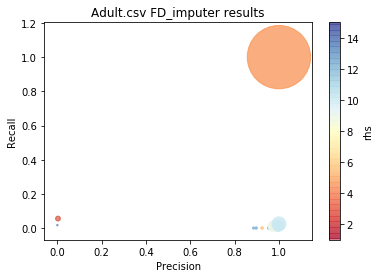

In [86]:
fig, ax = plt.subplots()
sc = plt.scatter(precision, 
                 recall, 
                 cmap=colormap,
                 c=rhs_color, 
                 s=area, 
                 alpha=0.5)
plt.colorbar(sc, label='rhs')
ax.set(title='Adult.csv FD_imputer results',
      xlabel = 'Precision',
      ylabel = 'Recall')
fig.savefig('fd_imputer_performance.png', transparent=False,
           dpi=320, bbox_inches='tight')

## ML imputation on fd's

In [58]:
ml_imputer_results = {}
for rhs in fds:
    results = []
    for lhs in fds[rhs]:
        relevant_cols = lhs + [rhs]
        
        # make sure that datawig doesn't perform regression on categories
        # also, select relevant subsets
        if rhs not in continuous:
            df_subset_train = df_train.iloc[:, relevant_cols].astype(
                {rhs: str})
            df_subset_validate = df_validate.iloc[:, relevant_cols].astype(
                {rhs: str})
            df_subset_test = df_test.iloc[:, relevant_cols].astype(
                {rhs: str})
        else:
            df_subset_train = df_train.iloc[:, relevant_cols]
            df_subset_validate = df_validate.iloc[:, relevant_cols]
            df_subset_test = df_test.iloc[:, relevant_cols]
        
        print(lhs, rhs)
        df_imputed = fd_imputer.ml_imputer(df_subset_train,
                                           df_subset_validate,
                                           df_subset_test,
                                           str(rhs))
        
        y_pred = df_imputed.loc[:, str(rhs)+'_imputed']
        y_true = df_imputed.loc[:, str(rhs)]
                
        if rhs in continuous:
            result = {
                'lhs': lhs,
                'mse': metrics.mean_squared_error(y_true, y_pred)
            }
        else:
            result = {
                'lhs': lhs,
                'precision': metrics.precision_score(y_true, y_pred, average='weighted'),
                'recall': metrics.recall_score(y_true, y_pred, average='weighted'),
                'f1': metrics.f1_score(y_true, y_pred, average='weighted')
            }
        results.append(result)
    ml_imputer_results[rhs] = results

[0] 3


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
2019-06-17 08:03:17,649 [INFO]  
========== start: fit model
2019-06-17 08:03:17,650 [WARNING]  Already bound, ignoring bind()
2019-06-17 08:03:18,561 [INFO]  Epoch[0] Batch [0-814]	Speed: 14465.09 samples/sec	cross-entropy=0.026789	3-accuracy=0.000000
2019-06-17 08:03:19,602 [INFO]  Epoch[0] Train-cross-entropy=0.013411
2019-06-17 08:03:19,603 [INFO]  Epoch[0] Train-3-accuracy=0.000000
2019-06-17 08:03:19,604 [INFO]  Epoch[0] Time cost=1.952
2019-06-17 08:03:19,608 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-17 08:03:19,722 [INFO]  Epoch[0] Validation-cross-entropy=0.000000
2019-06

[0] 11


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
2019-06-17 08:03:27,284 [WARNING]  Test set does not contain any ocurrences of values [Armed-Forces] in column [11], consider using a more representative test set.
2019-06-17 08:03:27,297 [INFO]  
========== start: fit model
2019-06-17 08:03:27,298 [WARNING]  Already bound, ignoring bind()
2019-06-17 08:03:38,533 [INFO]  Epoch[0] Batch [0-767]	Speed: 1102.35 samples/sec	cross-entropy=0.222396	11-accuracy=0.976807
2019-06-17 08:03:50,527 [INFO]  Epoch[0] Train-cross-entropy=0.116061
2019-06-17 08:03:50,529 [INFO]  Epoch[0] Train-11-accuracy=0.988225
2019-06-17 08:03:50,530 [INFO]  Epoch[0] Time cost=23.231
20

ValueError: could not convert string to float: 'Sales'

In [56]:
# this took forever, so better pickle the result
import pickle
#pickle.dump(ml_imputer_results, open( "adult_ml_results.p", "wb"))
ml_imputer_results = pickle.load(open("adult_ml_results.p", "rb"))

## Plot f1 scores

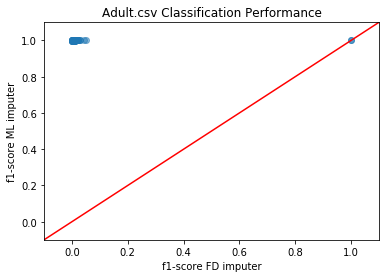

In [27]:
f1_fd = [y['f1'] for x in fd_imputer_results for y in fd_imputer_results[x] if 'f1' in y.keys()]
f1_ml = [y['f1'] for x in ml_imputer_results for y in ml_imputer_results[x] if 'f1' in y.keys()]
fig, ax = plt.subplots()
sc = plt.scatter(f1_fd, 
                 f1_ml, 
                 alpha=0.5)
plt.plot(np.linspace(-2, 2), np.linspace(-2, 2), c='red')
ax.set(title='Adult.csv Classification Performance',
      xlabel = 'f1-score FD imputer',
      ylabel = 'f1-score ML imputer',
      xlim = [-0.1, 1.1],
      ylim  = [-0.1, 1.1])
fig.savefig('ml-fd-classification.png', transparent=False,
           dpi=320, bbox_inches='tight')

## Plot MSE

In [28]:
mse_fd = [y['mse'] for x in fd_imputer_results for y in fd_imputer_results[x] if 'mse' in y.keys()]
mse_ml = [y['mse'] for x in ml_imputer_results for y in ml_imputer_results[x] if 'mse' in y.keys()]

In [32]:
rel_mse = []
for i, x in enumerate(mse_fd):
    if x != '':
        rel_mse.append(mse_fd[i]/mse_ml[i])
    else:
        rel_mse.append(np.nan)

Falls mse_fd / mse_ml > 1 ist, ist mse_ml kleiner als mse_fd um den Faktor, den man auf der y-Achse ablesen kann.
Generell ist diese Darstellung dubios, ich sollte die MSE lieber in einer Tabelle auffuehren.

[Text(0, 0.5, 'mse_fd / mse_ml'),
 (-0.1, 11),
 Text(0.5, 0, 'FD LHS combination'),
 Text(0.5, 1.0, 'Adult.csv Mean Squared Error of two imputers')]

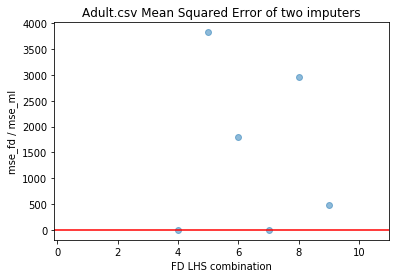

In [61]:
fig, ax = plt.subplots()
sc = plt.scatter(list(range(0, len(rel_mse))), 
                 rel_mse,
                 alpha=0.5)
plt.plot(np.linspace(-2, len(rel_mse)), [1]*50, c='red')
ax.set(title='Adult.csv Mean Squared Error of two imputers',
      xlabel = 'FD LHS combination',
      ylabel = 'mse_fd / mse_ml',
      xlim = [-0.1, 11])
#fig.savefig('ml-fd-regression.png', transparent=False,
           #dpi=320, bbox_inches='tight')

## Overfitting the ML imputer

In [10]:
ml_overfitting_results = {}
for rhs in fds:
    results = []
    for lhs in fds[rhs]:
        relevant_cols = lhs + [rhs]
        
        # make sure that datawig doesn't perform regression on categories
        # also, select relevant subsets
        if rhs not in continuous:
            df_subset_train = df_train.iloc[:, relevant_cols].astype(
                {rhs: str})
            df_subset_validate = df_validate.iloc[:, relevant_cols].astype(
                {rhs: str})
            df_subset_test = df_test.iloc[:, relevant_cols].astype(
                {rhs: str})
        else:
            df_subset_train = df_train.iloc[:, relevant_cols]
            df_subset_validate = df_validate.iloc[:, relevant_cols]
            df_subset_test = df_test.iloc[:, relevant_cols]
        
        print(rhs, lhs)
        # enforce overfitting by setting df_validate = df_train
        df_imputed = fd_imputer.ml_imputer(df_subset_train,
                                           df_subset_train,
                                           df_subset_test,
                                           str(rhs))
        
        y_pred = df_imputed.loc[:, str(rhs)+'_imputed']
        y_true = df_imputed.loc[:, str(rhs)]
                
        if rhs in continuous:
            result = {
                'lhs': lhs,
                'mse': metrics.mean_squared_error(y_true, y_pred)
            }
        else:
            result = {
                'lhs': lhs,
                'precision': metrics.precision_score(y_true, y_pred, average='weighted'),
                'recall': metrics.recall_score(y_true, y_pred, average='weighted'),
                'f1': metrics.f1_score(y_true, y_pred, average='weighted')
            }
        results.append(result)
    ml_overfitting_results[rhs] = results

3 [0]


2019-06-14 16:57:02,797 [INFO]  
========== start: fit model
2019-06-14 16:57:02,798 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:03,014 [INFO]  Epoch[0] Batch [0-184]	Speed: 13878.92 samples/sec	cross-entropy=0.298195	3-accuracy=0.000000
2019-06-14 16:57:03,219 [INFO]  Epoch[0] Train-cross-entropy=0.150668
2019-06-14 16:57:03,220 [INFO]  Epoch[0] Train-3-accuracy=0.000000
2019-06-14 16:57:03,221 [INFO]  Epoch[0] Time cost=0.421
2019-06-14 16:57:03,225 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:03,307 [INFO]  Epoch[0] Validation-cross-entropy=0.000538
2019-06-14 16:57:03,308 [INFO]  Epoch[0] Validation-3-accuracy=0.000000
2019-06-14 16:57:03,550 [INFO]  Epoch[1] Batch [0-184]	Speed: 12293.06 samples/sec	cross-entropy=0.000395	3-accuracy=0.000000
2019-06-14 16:57:03,806 [INFO]  Epoch[1] Train-cross-entropy=0.000341
2019-06-14 16:57:03,808 [INFO]  Epoch[1] Train-3-accuracy=0.000000
2019-06-14 16:57:03,810 [INFO]  Epoch[1] Time cost=0.502


11 [0]


2019-06-14 16:57:05,935 [INFO]  
========== start: fit model
2019-06-14 16:57:05,936 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:06,293 [INFO]  Epoch[0] Batch [0-184]	Speed: 8603.57 samples/sec	cross-entropy=1.066280	11-accuracy=0.000000
2019-06-14 16:57:06,504 [INFO]  Epoch[0] Train-cross-entropy=0.592937
2019-06-14 16:57:06,505 [INFO]  Epoch[0] Train-11-accuracy=0.000000
2019-06-14 16:57:06,506 [INFO]  Epoch[0] Time cost=0.567
2019-06-14 16:57:06,508 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:06,535 [INFO]  Epoch[0] Validation-cross-entropy=0.021884
2019-06-14 16:57:06,537 [INFO]  Epoch[0] Validation-11-accuracy=0.000000
2019-06-14 16:57:06,775 [INFO]  Epoch[1] Batch [0-184]	Speed: 12859.13 samples/sec	cross-entropy=0.004748	11-accuracy=0.000000
2019-06-14 16:57:06,989 [INFO]  Epoch[1] Train-cross-entropy=0.005206
2019-06-14 16:57:06,991 [INFO]  Epoch[1] Train-11-accuracy=0.000000
2019-06-14 16:57:06,992 [INFO]  Epoch[1] Time cost=0.

13 [0]


2019-06-14 16:57:10,205 [INFO]  
========== start: fit model
2019-06-14 16:57:10,206 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:10,416 [INFO]  Epoch[0] Batch [0-184]	Speed: 14643.71 samples/sec	cross-entropy=0.602221	13-accuracy=0.000000
2019-06-14 16:57:10,613 [INFO]  Epoch[0] Train-cross-entropy=0.304365
2019-06-14 16:57:10,614 [INFO]  Epoch[0] Train-13-accuracy=0.000000
2019-06-14 16:57:10,614 [INFO]  Epoch[0] Time cost=0.401
2019-06-14 16:57:10,618 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:10,645 [INFO]  Epoch[0] Validation-cross-entropy=0.000584
2019-06-14 16:57:10,646 [INFO]  Epoch[0] Validation-13-accuracy=0.000000
2019-06-14 16:57:10,829 [INFO]  Epoch[1] Batch [0-184]	Speed: 16466.96 samples/sec	cross-entropy=0.000830	13-accuracy=0.000000
2019-06-14 16:57:11,039 [INFO]  Epoch[1] Train-cross-entropy=0.000793
2019-06-14 16:57:11,040 [INFO]  Epoch[1] Train-13-accuracy=0.000000
2019-06-14 16:57:11,040 [INFO]  Epoch[1] Time cost=0

12 [0]


2019-06-14 16:57:12,530 [INFO]  
========== start: fit model
2019-06-14 16:57:12,531 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:12,728 [INFO]  Epoch[0] Batch [0-184]	Speed: 15393.32 samples/sec	cross-entropy=0.830361	12-accuracy=0.000000
2019-06-14 16:57:12,980 [INFO]  Epoch[0] Train-cross-entropy=0.419700
2019-06-14 16:57:12,982 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:57:12,983 [INFO]  Epoch[0] Time cost=0.449
2019-06-14 16:57:13,001 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:13,027 [INFO]  Epoch[0] Validation-cross-entropy=0.002001
2019-06-14 16:57:13,028 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:57:13,216 [INFO]  Epoch[1] Batch [0-184]	Speed: 16074.59 samples/sec	cross-entropy=0.001456	12-accuracy=0.000000
2019-06-14 16:57:13,389 [INFO]  Epoch[1] Train-cross-entropy=0.001198
2019-06-14 16:57:13,392 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:57:13,394 [INFO]  Epoch[1] Time cost=0

12 [13, 1, 2, 3, 4, 7]


2019-06-14 16:57:15,797 [INFO]  
========== start: fit model
2019-06-14 16:57:15,799 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:17,603 [INFO]  Epoch[0] Batch [0-184]	Speed: 1649.40 samples/sec	cross-entropy=0.652765	12-accuracy=0.000000
2019-06-14 16:57:19,324 [INFO]  Epoch[0] Train-cross-entropy=0.332963
2019-06-14 16:57:19,371 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:57:19,373 [INFO]  Epoch[0] Time cost=3.571
2019-06-14 16:57:19,381 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:19,774 [INFO]  Epoch[0] Validation-cross-entropy=0.004980
2019-06-14 16:57:19,775 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:57:21,582 [INFO]  Epoch[1] Batch [0-184]	Speed: 1641.48 samples/sec	cross-entropy=0.007360	12-accuracy=0.000000
2019-06-14 16:57:23,446 [INFO]  Epoch[1] Train-cross-entropy=0.006321
2019-06-14 16:57:23,448 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:57:23,451 [INFO]  Epoch[1] Time cost=3.6

12 [13, 1, 3, 4, 6, 7]


2019-06-14 16:57:40,870 [INFO]  
========== start: fit model
2019-06-14 16:57:40,872 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:57:42,711 [INFO]  Epoch[0] Batch [0-184]	Speed: 1611.55 samples/sec	cross-entropy=0.688080	12-accuracy=0.000000
2019-06-14 16:57:44,770 [INFO]  Epoch[0] Train-cross-entropy=0.354568
2019-06-14 16:57:44,773 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:57:44,776 [INFO]  Epoch[0] Time cost=3.901
2019-06-14 16:57:44,780 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:57:45,143 [INFO]  Epoch[0] Validation-cross-entropy=0.008558
2019-06-14 16:57:45,145 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:57:47,303 [INFO]  Epoch[1] Batch [0-184]	Speed: 1372.45 samples/sec	cross-entropy=0.004944	12-accuracy=0.000000
2019-06-14 16:57:49,480 [INFO]  Epoch[1] Train-cross-entropy=0.005485
2019-06-14 16:57:49,481 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:57:49,482 [INFO]  Epoch[1] Time cost=4.3

12 [13, 1, 3, 4, 7, 8]


2019-06-14 16:58:22,961 [INFO]  
========== start: fit model
2019-06-14 16:58:22,962 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:58:25,521 [INFO]  Epoch[0] Batch [0-184]	Speed: 1158.63 samples/sec	cross-entropy=0.699246	12-accuracy=0.000000
2019-06-14 16:58:28,157 [INFO]  Epoch[0] Train-cross-entropy=0.356355
2019-06-14 16:58:28,167 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:58:28,169 [INFO]  Epoch[0] Time cost=5.203
2019-06-14 16:58:28,172 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:58:28,634 [INFO]  Epoch[0] Validation-cross-entropy=0.005687
2019-06-14 16:58:28,635 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:58:31,269 [INFO]  Epoch[1] Batch [0-184]	Speed: 1124.71 samples/sec	cross-entropy=0.004529	12-accuracy=0.000000
2019-06-14 16:58:33,717 [INFO]  Epoch[1] Train-cross-entropy=0.006488
2019-06-14 16:58:33,720 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:58:33,721 [INFO]  Epoch[1] Time cost=5.0

12 [13, 1, 2, 3, 5, 7]


2019-06-14 16:59:23,466 [INFO]  
========== start: fit model
2019-06-14 16:59:23,467 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:59:25,118 [INFO]  Epoch[0] Batch [0-184]	Speed: 1799.71 samples/sec	cross-entropy=0.813505	12-accuracy=0.000000
2019-06-14 16:59:26,732 [INFO]  Epoch[0] Train-cross-entropy=0.418680
2019-06-14 16:59:26,734 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:59:26,736 [INFO]  Epoch[0] Time cost=3.267
2019-06-14 16:59:26,741 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:59:27,051 [INFO]  Epoch[0] Validation-cross-entropy=0.007281
2019-06-14 16:59:27,052 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:59:28,766 [INFO]  Epoch[1] Batch [0-184]	Speed: 1728.24 samples/sec	cross-entropy=0.011322	12-accuracy=0.000000
2019-06-14 16:59:30,430 [INFO]  Epoch[1] Train-cross-entropy=0.009305
2019-06-14 16:59:30,431 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:59:30,432 [INFO]  Epoch[1] Time cost=3.3

12 [13, 1, 3, 5, 6, 7]


2019-06-14 16:59:46,331 [INFO]  
========== start: fit model
2019-06-14 16:59:46,332 [WARNING]  Already bound, ignoring bind()
2019-06-14 16:59:47,976 [INFO]  Epoch[0] Batch [0-184]	Speed: 1804.55 samples/sec	cross-entropy=0.762862	12-accuracy=0.000000
2019-06-14 16:59:49,597 [INFO]  Epoch[0] Train-cross-entropy=0.392990
2019-06-14 16:59:49,600 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 16:59:49,601 [INFO]  Epoch[0] Time cost=3.267
2019-06-14 16:59:49,606 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 16:59:49,944 [INFO]  Epoch[0] Validation-cross-entropy=0.010578
2019-06-14 16:59:49,946 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 16:59:51,559 [INFO]  Epoch[1] Batch [0-184]	Speed: 1838.20 samples/sec	cross-entropy=0.010756	12-accuracy=0.000000
2019-06-14 16:59:53,189 [INFO]  Epoch[1] Train-cross-entropy=0.011128
2019-06-14 16:59:53,190 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 16:59:53,191 [INFO]  Epoch[1] Time cost=3.2

12 [13, 1, 3, 5, 7, 8]


2019-06-14 17:00:09,243 [INFO]  
========== start: fit model
2019-06-14 17:00:09,244 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:00:10,861 [INFO]  Epoch[0] Batch [0-184]	Speed: 1836.14 samples/sec	cross-entropy=0.773913	12-accuracy=0.000000
2019-06-14 17:00:12,475 [INFO]  Epoch[0] Train-cross-entropy=0.399561
2019-06-14 17:00:12,476 [INFO]  Epoch[0] Train-12-accuracy=0.000000
2019-06-14 17:00:12,477 [INFO]  Epoch[0] Time cost=3.230
2019-06-14 17:00:12,482 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:00:12,792 [INFO]  Epoch[0] Validation-cross-entropy=0.007612
2019-06-14 17:00:12,794 [INFO]  Epoch[0] Validation-12-accuracy=0.000000
2019-06-14 17:00:14,429 [INFO]  Epoch[1] Batch [0-184]	Speed: 1813.08 samples/sec	cross-entropy=0.009352	12-accuracy=0.000000
2019-06-14 17:00:16,076 [INFO]  Epoch[1] Train-cross-entropy=0.009718
2019-06-14 17:00:16,486 [INFO]  Epoch[1] Train-12-accuracy=0.000000
2019-06-14 17:00:16,490 [INFO]  Epoch[1] Time cost=3.6

1 [0]


2019-06-14 17:00:28,195 [INFO]  
========== start: fit model
2019-06-14 17:00:28,196 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:00:28,368 [INFO]  Epoch[0] Batch [0-184]	Speed: 17662.70 samples/sec	cross-entropy=0.976508	1-accuracy=0.000000
2019-06-14 17:00:28,529 [INFO]  Epoch[0] Train-cross-entropy=0.494537
2019-06-14 17:00:28,530 [INFO]  Epoch[0] Train-1-accuracy=0.000000
2019-06-14 17:00:28,531 [INFO]  Epoch[0] Time cost=0.332
2019-06-14 17:00:28,534 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:00:28,554 [INFO]  Epoch[0] Validation-cross-entropy=0.001725
2019-06-14 17:00:28,555 [INFO]  Epoch[0] Validation-1-accuracy=0.000000
2019-06-14 17:00:28,747 [INFO]  Epoch[1] Batch [0-184]	Speed: 15634.48 samples/sec	cross-entropy=0.001086	1-accuracy=0.000000
2019-06-14 17:00:28,933 [INFO]  Epoch[1] Train-cross-entropy=0.000797
2019-06-14 17:00:28,934 [INFO]  Epoch[1] Train-1-accuracy=0.000000
2019-06-14 17:00:28,935 [INFO]  Epoch[1] Time cost=0.379


2019-06-14 17:00:32,116 [INFO]  CategoricalEncoder for column 14                                found only 6 occurrences of value Japan
2019-06-14 17:00:32,118 [INFO]  CategoricalEncoder for column 14                                found only 6 occurrences of value Portugal
2019-06-14 17:00:32,119 [INFO]  CategoricalEncoder for column 14                                found only 6 occurrences of value Scotland
2019-06-14 17:00:32,120 [INFO]  CategoricalEncoder for column 14                                found only 6 occurrences of value Trinadad&Tobago
2019-06-14 17:00:32,121 [INFO]  CategoricalEncoder for column 14                                found only 5 occurrences of value Hong
2019-06-14 17:00:32,122 [INFO]  CategoricalEncoder for column 14                                found only 5 occurrences of value Peru
2019-06-14 17:00:32,123 [INFO]  CategoricalEncoder for column 14                                found only 4 occurrences of value Ireland
2019-06-14 17:00:32,124 [INFO]  

14 [0]


2019-06-14 17:00:32,341 [WARNING]  Test set does not contain any ocurrences of values [Laos, Honduras, Scotland, Ecuador, Poland, China, Peru, England, Trinadad&Tobago, Haiti, Cambodia, Portugal, France, Yugoslavia, Hong] in column [14], consider using a more representative test set.
2019-06-14 17:00:32,350 [INFO]  
========== start: fit model
2019-06-14 17:00:32,351 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:00:36,400 [INFO]  Epoch[0] Batch [0-184]	Speed: 736.20 samples/sec	cross-entropy=0.662016	14-accuracy=0.902027
2019-06-14 17:00:40,321 [INFO]  Epoch[0] Train-cross-entropy=0.454331
2019-06-14 17:00:40,322 [INFO]  Epoch[0] Train-14-accuracy=0.924557
2019-06-14 17:00:40,323 [INFO]  Epoch[0] Time cost=7.967
2019-06-14 17:00:40,341 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:00:40,725 [INFO]  Epoch[0] Validation-cross-entropy=0.146721
2019-06-14 17:00:40,727 [INFO]  Epoch[0] Validation-14-accuracy=0.963415
2019-06-14 17:00:44,741 [INFO]  Ep

4 [0]


2019-06-14 17:02:01,834 [INFO]  
========== start: fit model
2019-06-14 17:02:01,836 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:02:04,631 [INFO]  Epoch[0] Batch [0-184]	Speed: 1065.12 samples/sec	cross-entropy=0.869949	4-accuracy=0.842230
2019-06-14 17:02:07,456 [INFO]  Epoch[0] Train-cross-entropy=0.535659
2019-06-14 17:02:07,459 [INFO]  Epoch[0] Train-4-accuracy=0.915531
2019-06-14 17:02:07,462 [INFO]  Epoch[0] Time cost=5.624
2019-06-14 17:02:07,471 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:02:07,808 [INFO]  Epoch[0] Validation-cross-entropy=0.117296
2019-06-14 17:02:07,809 [INFO]  Epoch[0] Validation-4-accuracy=0.996951
2019-06-14 17:02:10,457 [INFO]  Epoch[1] Batch [0-184]	Speed: 1119.07 samples/sec	cross-entropy=0.076975	4-accuracy=0.998649
2019-06-14 17:02:13,029 [INFO]  Epoch[1] Train-cross-entropy=0.059861
2019-06-14 17:02:13,031 [INFO]  Epoch[1] Train-4-accuracy=0.998978
2019-06-14 17:02:13,034 [INFO]  Epoch[1] Time cost=5.224
20

4 [5]


2019-06-14 17:03:04,502 [INFO]  
========== start: fit model
2019-06-14 17:03:04,503 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:03:07,188 [INFO]  Epoch[0] Batch [0-184]	Speed: 1108.46 samples/sec	cross-entropy=0.644641	4-accuracy=0.894257
2019-06-14 17:03:09,781 [INFO]  Epoch[0] Train-cross-entropy=0.374116
2019-06-14 17:03:09,784 [INFO]  Epoch[0] Train-4-accuracy=0.944823
2019-06-14 17:03:09,786 [INFO]  Epoch[0] Time cost=5.281
2019-06-14 17:03:09,795 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:03:10,147 [INFO]  Epoch[0] Validation-cross-entropy=0.054046
2019-06-14 17:03:10,149 [INFO]  Epoch[0] Validation-4-accuracy=1.000000
2019-06-14 17:03:12,777 [INFO]  Epoch[1] Batch [0-184]	Speed: 1126.95 samples/sec	cross-entropy=0.037142	4-accuracy=0.999662
2019-06-14 17:03:15,381 [INFO]  Epoch[1] Train-cross-entropy=0.028754
2019-06-14 17:03:15,383 [INFO]  Epoch[1] Train-4-accuracy=0.999830
2019-06-14 17:03:15,384 [INFO]  Epoch[1] Time cost=5.234
20

5 [0]


2019-06-14 17:04:06,595 [INFO]  
========== start: fit model
2019-06-14 17:04:06,596 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:04:09,252 [INFO]  Epoch[0] Batch [0-184]	Speed: 1121.85 samples/sec	cross-entropy=1.549833	5-accuracy=0.636486
2019-06-14 17:04:12,290 [INFO]  Epoch[0] Train-cross-entropy=1.217560
2019-06-14 17:04:12,292 [INFO]  Epoch[0] Train-5-accuracy=0.713896
2019-06-14 17:04:12,295 [INFO]  Epoch[0] Time cost=5.693
2019-06-14 17:04:12,305 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:04:12,643 [INFO]  Epoch[0] Validation-cross-entropy=0.649518
2019-06-14 17:04:12,644 [INFO]  Epoch[0] Validation-5-accuracy=0.893293
2019-06-14 17:04:15,337 [INFO]  Epoch[1] Batch [0-184]	Speed: 1100.12 samples/sec	cross-entropy=0.517521	5-accuracy=0.927703
2019-06-14 17:04:18,182 [INFO]  Epoch[1] Train-cross-entropy=0.433780
2019-06-14 17:04:18,183 [INFO]  Epoch[1] Train-5-accuracy=0.951124
2019-06-14 17:04:18,184 [INFO]  Epoch[1] Time cost=5.537
20

5 [4]


2019-06-14 17:05:10,334 [INFO]  
========== start: fit model
2019-06-14 17:05:10,335 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:05:12,880 [INFO]  Epoch[0] Batch [0-184]	Speed: 1169.59 samples/sec	cross-entropy=0.795001	5-accuracy=0.964189
2019-06-14 17:05:15,314 [INFO]  Epoch[0] Train-cross-entropy=0.461795
2019-06-14 17:05:15,315 [INFO]  Epoch[0] Train-5-accuracy=0.981097
2019-06-14 17:05:15,317 [INFO]  Epoch[0] Time cost=4.978
2019-06-14 17:05:15,328 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:05:15,668 [INFO]  Epoch[0] Validation-cross-entropy=0.072084
2019-06-14 17:05:15,669 [INFO]  Epoch[0] Validation-5-accuracy=0.996951
2019-06-14 17:05:18,148 [INFO]  Epoch[1] Batch [0-184]	Speed: 1195.74 samples/sec	cross-entropy=0.047156	5-accuracy=0.998311
2019-06-14 17:05:20,552 [INFO]  Epoch[1] Train-cross-entropy=0.036789
2019-06-14 17:05:20,553 [INFO]  Epoch[1] Train-5-accuracy=0.998978
2019-06-14 17:05:20,554 [INFO]  Epoch[1] Time cost=4.883
20

7 [0]


2019-06-14 17:06:09,797 [WARNING]  Test set does not contain any ocurrences of values [Priv-house-serv, Armed-Forces] in column [7], consider using a more representative test set.
2019-06-14 17:06:09,803 [INFO]  
========== start: fit model
2019-06-14 17:06:09,805 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:06:12,315 [INFO]  Epoch[0] Batch [0-184]	Speed: 1183.56 samples/sec	cross-entropy=0.880251	7-accuracy=0.896284
2019-06-14 17:06:14,781 [INFO]  Epoch[0] Train-cross-entropy=0.501913
2019-06-14 17:06:14,784 [INFO]  Epoch[0] Train-7-accuracy=0.946526
2019-06-14 17:06:14,785 [INFO]  Epoch[0] Time cost=4.978
2019-06-14 17:06:14,793 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:06:15,138 [INFO]  Epoch[0] Validation-cross-entropy=0.057339
2019-06-14 17:06:15,141 [INFO]  Epoch[0] Validation-7-accuracy=1.000000
2019-06-14 17:06:17,679 [INFO]  Epoch[1] Batch [0-184]	Speed: 1167.64 samples/sec	cross-entropy=0.043866	7-accuracy=0.999662
2019-06-14 17:06

2 [0]


2019-06-14 17:07:15,618 [INFO]  
========== start: fit model
2019-06-14 17:07:15,619 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:07:18,032 [INFO]  Epoch[0] Batch [0-184]	Speed: 1231.23 samples/sec	cross-entropy=0.492249	2-accuracy=0.881081
2019-06-14 17:07:20,570 [INFO]  Epoch[0] Train-cross-entropy=0.287406
2019-06-14 17:07:20,572 [INFO]  Epoch[0] Train-2-accuracy=0.939544
2019-06-14 17:07:20,574 [INFO]  Epoch[0] Time cost=4.951
2019-06-14 17:07:20,580 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:07:21,133 [INFO]  Epoch[0] Validation-cross-entropy=0.044659
2019-06-14 17:07:21,135 [INFO]  Epoch[0] Validation-2-accuracy=1.000000
2019-06-14 17:07:23,435 [INFO]  Epoch[1] Batch [0-184]	Speed: 1292.93 samples/sec	cross-entropy=0.031919	2-accuracy=1.000000
2019-06-14 17:07:25,500 [INFO]  Epoch[1] Train-cross-entropy=0.025119
2019-06-14 17:07:25,501 [INFO]  Epoch[1] Train-2-accuracy=1.000000
2019-06-14 17:07:25,502 [INFO]  Epoch[1] Time cost=4.366
20

6 [0]


2019-06-14 17:08:23,841 [INFO]  
========== start: fit model
2019-06-14 17:08:23,842 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:08:26,265 [INFO]  Epoch[0] Batch [0-184]	Speed: 1227.18 samples/sec	cross-entropy=0.439442	6-accuracy=0.926014
2019-06-14 17:08:28,620 [INFO]  Epoch[0] Train-cross-entropy=0.254764
2019-06-14 17:08:28,623 [INFO]  Epoch[0] Train-6-accuracy=0.961172
2019-06-14 17:08:28,625 [INFO]  Epoch[0] Time cost=4.779
2019-06-14 17:08:28,631 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:08:28,988 [INFO]  Epoch[0] Validation-cross-entropy=0.042533
2019-06-14 17:08:28,991 [INFO]  Epoch[0] Validation-6-accuracy=0.998476
2019-06-14 17:08:31,753 [INFO]  Epoch[1] Batch [0-184]	Speed: 1071.68 samples/sec	cross-entropy=0.025545	6-accuracy=1.000000
2019-06-14 17:08:34,278 [INFO]  Epoch[1] Train-cross-entropy=0.023481
2019-06-14 17:08:34,280 [INFO]  Epoch[1] Train-6-accuracy=0.999319
2019-06-14 17:08:34,282 [INFO]  Epoch[1] Time cost=5.288
20

6 [11, 13, 1, 3, 7, 8]


2019-06-14 17:09:39,028 [INFO]  
========== start: fit model
2019-06-14 17:09:39,030 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:09:43,096 [INFO]  Epoch[0] Batch [0-184]	Speed: 733.34 samples/sec	cross-entropy=0.479890	6-accuracy=0.878378
2019-06-14 17:09:46,968 [INFO]  Epoch[0] Train-cross-entropy=0.301931
2019-06-14 17:09:46,970 [INFO]  Epoch[0] Train-6-accuracy=0.932902
2019-06-14 17:09:46,991 [INFO]  Epoch[0] Time cost=7.948
2019-06-14 17:09:47,006 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:09:47,631 [INFO]  Epoch[0] Validation-cross-entropy=0.076441
2019-06-14 17:09:47,636 [INFO]  Epoch[0] Validation-6-accuracy=0.995427
2019-06-14 17:09:51,470 [INFO]  Epoch[1] Batch [0-184]	Speed: 772.85 samples/sec	cross-entropy=0.057595	6-accuracy=0.997297
2019-06-14 17:09:55,382 [INFO]  Epoch[1] Train-cross-entropy=0.047278
2019-06-14 17:09:55,384 [INFO]  Epoch[1] Train-6-accuracy=0.997446
2019-06-14 17:09:55,389 [INFO]  Epoch[1] Time cost=7.751
2019

6 [13, 1, 3, 4, 7, 8]


2019-06-14 17:11:02,216 [INFO]  
========== start: fit model
2019-06-14 17:11:02,220 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:11:06,396 [INFO]  Epoch[0] Batch [0-184]	Speed: 715.03 samples/sec	cross-entropy=0.520329	6-accuracy=0.859797
2019-06-14 17:11:10,145 [INFO]  Epoch[0] Train-cross-entropy=0.335109
2019-06-14 17:11:10,147 [INFO]  Epoch[0] Train-6-accuracy=0.920300
2019-06-14 17:11:10,151 [INFO]  Epoch[0] Time cost=7.919
2019-06-14 17:11:10,158 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:11:10,792 [INFO]  Epoch[0] Validation-cross-entropy=0.095904
2019-06-14 17:11:10,796 [INFO]  Epoch[0] Validation-6-accuracy=0.992378
2019-06-14 17:11:14,571 [INFO]  Epoch[1] Batch [0-184]	Speed: 783.44 samples/sec	cross-entropy=0.070173	6-accuracy=0.997297
2019-06-14 17:11:18,392 [INFO]  Epoch[1] Train-cross-entropy=0.057829
2019-06-14 17:11:18,394 [INFO]  Epoch[1] Train-6-accuracy=0.997616
2019-06-14 17:11:18,411 [INFO]  Epoch[1] Time cost=7.607
2019

6 [13, 1, 3, 5, 7, 8]


2019-06-14 17:12:39,100 [INFO]  
========== start: fit model
2019-06-14 17:12:39,103 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:12:42,913 [INFO]  Epoch[0] Batch [0-184]	Speed: 779.62 samples/sec	cross-entropy=0.474542	6-accuracy=0.878716
2019-06-14 17:12:47,056 [INFO]  Epoch[0] Train-cross-entropy=0.298018
2019-06-14 17:12:47,059 [INFO]  Epoch[0] Train-6-accuracy=0.933583
2019-06-14 17:12:47,064 [INFO]  Epoch[0] Time cost=7.953
2019-06-14 17:12:47,083 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:12:47,659 [INFO]  Epoch[0] Validation-cross-entropy=0.078318
2019-06-14 17:12:47,662 [INFO]  Epoch[0] Validation-6-accuracy=0.995427
2019-06-14 17:12:51,391 [INFO]  Epoch[1] Batch [0-184]	Speed: 796.66 samples/sec	cross-entropy=0.054439	6-accuracy=0.998311
2019-06-14 17:12:55,158 [INFO]  Epoch[1] Train-cross-entropy=0.045379
2019-06-14 17:12:55,160 [INFO]  Epoch[1] Train-6-accuracy=0.998297
2019-06-14 17:12:55,163 [INFO]  Epoch[1] Time cost=7.499
2019

8 [0]


2019-06-14 17:14:07,403 [INFO]  
========== start: fit model
2019-06-14 17:14:07,405 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:14:10,900 [INFO]  Epoch[0] Batch [0-184]	Speed: 847.87 samples/sec	cross-entropy=0.455399	8-accuracy=0.926351
2019-06-14 17:14:13,360 [INFO]  Epoch[0] Train-cross-entropy=0.256121
2019-06-14 17:14:13,361 [INFO]  Epoch[0] Train-8-accuracy=0.962875
2019-06-14 17:14:13,364 [INFO]  Epoch[0] Time cost=5.953
2019-06-14 17:14:13,370 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:14:13,749 [INFO]  Epoch[0] Validation-cross-entropy=0.030659
2019-06-14 17:14:13,752 [INFO]  Epoch[0] Validation-8-accuracy=1.000000
2019-06-14 17:14:17,396 [INFO]  Epoch[1] Batch [0-184]	Speed: 812.45 samples/sec	cross-entropy=0.022067	8-accuracy=1.000000
2019-06-14 17:14:21,235 [INFO]  Epoch[1] Train-cross-entropy=0.017358
2019-06-14 17:14:21,238 [INFO]  Epoch[1] Train-8-accuracy=1.000000
2019-06-14 17:14:21,241 [INFO]  Epoch[1] Time cost=7.487
2019

9 [0]


2019-06-14 17:15:37,845 [INFO]  
========== start: fit model
2019-06-14 17:15:37,849 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:15:41,863 [INFO]  Epoch[0] Batch [0-184]	Speed: 739.67 samples/sec	cross-entropy=0.300329	9-accuracy=0.939527
2019-06-14 17:15:45,831 [INFO]  Epoch[0] Train-cross-entropy=0.175455
2019-06-14 17:15:45,833 [INFO]  Epoch[0] Train-9-accuracy=0.965259
2019-06-14 17:15:45,836 [INFO]  Epoch[0] Time cost=7.978
2019-06-14 17:15:45,846 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:15:46,453 [INFO]  Epoch[0] Validation-cross-entropy=0.032067
2019-06-14 17:15:46,455 [INFO]  Epoch[0] Validation-9-accuracy=0.989329
2019-06-14 17:15:50,451 [INFO]  Epoch[1] Batch [0-184]	Speed: 742.69 samples/sec	cross-entropy=0.020838	9-accuracy=0.998649
2019-06-14 17:15:53,434 [INFO]  Epoch[1] Train-cross-entropy=0.016070
2019-06-14 17:15:53,438 [INFO]  Epoch[1] Train-9-accuracy=0.999319
2019-06-14 17:15:53,439 [INFO]  Epoch[1] Time cost=6.980
2019

9 [11, 12, 13, 3, 7, 8]


2019-06-14 17:16:39,439 [INFO]  
========== start: fit model
2019-06-14 17:16:39,441 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:16:41,526 [INFO]  Epoch[0] Batch [0-184]	Speed: 1423.59 samples/sec	cross-entropy=0.395164	9-accuracy=0.880405
2019-06-14 17:16:44,250 [INFO]  Epoch[0] Train-cross-entropy=0.259400
2019-06-14 17:16:44,252 [INFO]  Epoch[0] Train-9-accuracy=0.928644
2019-06-14 17:16:44,253 [INFO]  Epoch[0] Time cost=4.810
2019-06-14 17:16:44,258 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:16:44,855 [INFO]  Epoch[0] Validation-cross-entropy=0.092876
2019-06-14 17:16:44,859 [INFO]  Epoch[0] Validation-9-accuracy=0.984756
2019-06-14 17:16:47,475 [INFO]  Epoch[1] Batch [0-184]	Speed: 1134.21 samples/sec	cross-entropy=0.070718	9-accuracy=0.989189
2019-06-14 17:16:50,115 [INFO]  Epoch[1] Train-cross-entropy=0.054189
2019-06-14 17:16:50,117 [INFO]  Epoch[1] Train-9-accuracy=0.991826
2019-06-14 17:16:50,118 [INFO]  Epoch[1] Time cost=5.257
20

9 [12, 13, 15, 3, 4, 6, 8]


2019-06-14 17:17:34,803 [INFO]  
========== start: fit model
2019-06-14 17:17:34,804 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:17:36,725 [INFO]  Epoch[0] Batch [0-184]	Speed: 1548.17 samples/sec	cross-entropy=0.405912	9-accuracy=0.867568
2019-06-14 17:17:38,646 [INFO]  Epoch[0] Train-cross-entropy=0.273191
2019-06-14 17:17:38,648 [INFO]  Epoch[0] Train-9-accuracy=0.917916
2019-06-14 17:17:38,650 [INFO]  Epoch[0] Time cost=3.843
2019-06-14 17:17:38,656 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:17:38,969 [INFO]  Epoch[0] Validation-cross-entropy=0.101404
2019-06-14 17:17:38,971 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:17:40,954 [INFO]  Epoch[1] Batch [0-184]	Speed: 1493.90 samples/sec	cross-entropy=0.075256	9-accuracy=0.990541
2019-06-14 17:17:42,868 [INFO]  Epoch[1] Train-cross-entropy=0.058926
2019-06-14 17:17:42,870 [INFO]  Epoch[1] Train-9-accuracy=0.992337
2019-06-14 17:17:42,871 [INFO]  Epoch[1] Time cost=3.899
20

9 [12, 13, 15, 3, 5, 6, 8]


2019-06-14 17:18:23,650 [INFO]  
========== start: fit model
2019-06-14 17:18:23,652 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:18:25,588 [INFO]  Epoch[0] Batch [0-184]	Speed: 1532.79 samples/sec	cross-entropy=0.404062	9-accuracy=0.869932
2019-06-14 17:18:27,526 [INFO]  Epoch[0] Train-cross-entropy=0.271240
2019-06-14 17:18:27,529 [INFO]  Epoch[0] Train-9-accuracy=0.920811
2019-06-14 17:18:27,530 [INFO]  Epoch[0] Time cost=3.876
2019-06-14 17:18:27,536 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:18:27,863 [INFO]  Epoch[0] Validation-cross-entropy=0.101069
2019-06-14 17:18:27,865 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:18:29,827 [INFO]  Epoch[1] Batch [0-184]	Speed: 1509.84 samples/sec	cross-entropy=0.074832	9-accuracy=0.990541
2019-06-14 17:18:31,814 [INFO]  Epoch[1] Train-cross-entropy=0.058753
2019-06-14 17:18:31,815 [INFO]  Epoch[1] Train-9-accuracy=0.992166
2019-06-14 17:18:31,817 [INFO]  Epoch[1] Time cost=3.951
20

9 [13, 1, 3, 4]


2019-06-14 17:19:11,879 [INFO]  
========== start: fit model
2019-06-14 17:19:11,880 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:19:13,811 [INFO]  Epoch[0] Batch [0-184]	Speed: 1540.87 samples/sec	cross-entropy=0.312408	9-accuracy=0.920270
2019-06-14 17:19:15,720 [INFO]  Epoch[0] Train-cross-entropy=0.189284
2019-06-14 17:19:15,723 [INFO]  Epoch[0] Train-9-accuracy=0.955041
2019-06-14 17:19:15,724 [INFO]  Epoch[0] Time cost=3.840
2019-06-14 17:19:15,729 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:19:16,049 [INFO]  Epoch[0] Validation-cross-entropy=0.043489
2019-06-14 17:19:16,050 [INFO]  Epoch[0] Validation-9-accuracy=0.987805
2019-06-14 17:19:18,004 [INFO]  Epoch[1] Batch [0-184]	Speed: 1516.63 samples/sec	cross-entropy=0.030312	9-accuracy=0.995608
2019-06-14 17:19:19,897 [INFO]  Epoch[1] Train-cross-entropy=0.022907
2019-06-14 17:19:19,899 [INFO]  Epoch[1] Train-9-accuracy=0.997446
2019-06-14 17:19:19,901 [INFO]  Epoch[1] Time cost=3.849
20

9 [13, 1, 3, 5]


2019-06-14 17:19:59,336 [INFO]  
========== start: fit model
2019-06-14 17:19:59,338 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:20:01,454 [INFO]  Epoch[0] Batch [0-184]	Speed: 1406.24 samples/sec	cross-entropy=0.285191	9-accuracy=0.936486
2019-06-14 17:20:03,881 [INFO]  Epoch[0] Train-cross-entropy=0.168046
2019-06-14 17:20:03,883 [INFO]  Epoch[0] Train-9-accuracy=0.964067
2019-06-14 17:20:03,884 [INFO]  Epoch[0] Time cost=4.542
2019-06-14 17:20:03,892 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:20:04,316 [INFO]  Epoch[0] Validation-cross-entropy=0.033225
2019-06-14 17:20:04,319 [INFO]  Epoch[0] Validation-9-accuracy=0.992378
2019-06-14 17:20:06,294 [INFO]  Epoch[1] Batch [0-184]	Speed: 1500.44 samples/sec	cross-entropy=0.022163	9-accuracy=0.997635
2019-06-14 17:20:08,209 [INFO]  Epoch[1] Train-cross-entropy=0.016523
2019-06-14 17:20:08,629 [INFO]  Epoch[1] Train-9-accuracy=0.998638
2019-06-14 17:20:08,633 [INFO]  Epoch[1] Time cost=4.313
20

9 [13, 1, 2, 3, 7]


2019-06-14 17:20:48,033 [INFO]  
========== start: fit model
2019-06-14 17:20:48,035 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:20:50,207 [INFO]  Epoch[0] Batch [0-184]	Speed: 1370.09 samples/sec	cross-entropy=0.380878	9-accuracy=0.887838
2019-06-14 17:20:52,490 [INFO]  Epoch[0] Train-cross-entropy=0.250302
2019-06-14 17:20:52,493 [INFO]  Epoch[0] Train-9-accuracy=0.933413
2019-06-14 17:20:52,496 [INFO]  Epoch[0] Time cost=4.456
2019-06-14 17:20:52,500 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:20:52,849 [INFO]  Epoch[0] Validation-cross-entropy=0.086723
2019-06-14 17:20:52,850 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:20:54,799 [INFO]  Epoch[1] Batch [0-184]	Speed: 1520.57 samples/sec	cross-entropy=0.063579	9-accuracy=0.990878
2019-06-14 17:20:56,710 [INFO]  Epoch[1] Train-cross-entropy=0.050075
2019-06-14 17:20:56,713 [INFO]  Epoch[1] Train-9-accuracy=0.993018
2019-06-14 17:20:56,714 [INFO]  Epoch[1] Time cost=3.863
20

9 [13, 14, 3, 4, 7]


2019-06-14 17:21:38,010 [INFO]  
========== start: fit model
2019-06-14 17:21:38,011 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:21:40,005 [INFO]  Epoch[0] Batch [0-184]	Speed: 1488.89 samples/sec	cross-entropy=0.397196	9-accuracy=0.877703
2019-06-14 17:21:41,942 [INFO]  Epoch[0] Train-cross-entropy=0.262641
2019-06-14 17:21:41,944 [INFO]  Epoch[0] Train-9-accuracy=0.925579
2019-06-14 17:21:41,946 [INFO]  Epoch[0] Time cost=3.932
2019-06-14 17:21:41,952 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:21:42,275 [INFO]  Epoch[0] Validation-cross-entropy=0.091529
2019-06-14 17:21:42,338 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:21:44,335 [INFO]  Epoch[1] Batch [0-184]	Speed: 1504.73 samples/sec	cross-entropy=0.068787	9-accuracy=0.990203
2019-06-14 17:21:46,253 [INFO]  Epoch[1] Train-cross-entropy=0.053790
2019-06-14 17:21:46,254 [INFO]  Epoch[1] Train-9-accuracy=0.992677
2019-06-14 17:21:46,256 [INFO]  Epoch[1] Time cost=3.914
20

9 [13, 14, 3, 4, 6, 8]


2019-06-14 17:22:27,397 [INFO]  
========== start: fit model
2019-06-14 17:22:27,400 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:22:29,361 [INFO]  Epoch[0] Batch [0-184]	Speed: 1518.10 samples/sec	cross-entropy=0.414301	9-accuracy=0.865203
2019-06-14 17:22:31,288 [INFO]  Epoch[0] Train-cross-entropy=0.282081
2019-06-14 17:22:31,290 [INFO]  Epoch[0] Train-9-accuracy=0.914680
2019-06-14 17:22:31,291 [INFO]  Epoch[0] Time cost=3.889
2019-06-14 17:22:31,297 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:22:31,649 [INFO]  Epoch[0] Validation-cross-entropy=0.105442
2019-06-14 17:22:31,652 [INFO]  Epoch[0] Validation-9-accuracy=0.981707
2019-06-14 17:22:33,609 [INFO]  Epoch[1] Batch [0-184]	Speed: 1514.62 samples/sec	cross-entropy=0.083774	9-accuracy=0.988176
2019-06-14 17:22:35,635 [INFO]  Epoch[1] Train-cross-entropy=0.065763
2019-06-14 17:22:35,637 [INFO]  Epoch[1] Train-9-accuracy=0.991144
2019-06-14 17:22:35,638 [INFO]  Epoch[1] Time cost=3.985
20

9 [13, 14, 3, 5, 7]


2019-06-14 17:23:20,197 [INFO]  
========== start: fit model
2019-06-14 17:23:20,199 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:23:22,280 [INFO]  Epoch[0] Batch [0-184]	Speed: 1429.40 samples/sec	cross-entropy=0.389939	9-accuracy=0.887162
2019-06-14 17:23:24,207 [INFO]  Epoch[0] Train-cross-entropy=0.257324
2019-06-14 17:23:24,208 [INFO]  Epoch[0] Train-9-accuracy=0.930858
2019-06-14 17:23:24,210 [INFO]  Epoch[0] Time cost=4.007
2019-06-14 17:23:24,219 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:23:24,557 [INFO]  Epoch[0] Validation-cross-entropy=0.090022
2019-06-14 17:23:24,558 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:23:26,557 [INFO]  Epoch[1] Batch [0-184]	Speed: 1484.97 samples/sec	cross-entropy=0.067788	9-accuracy=0.990541
2019-06-14 17:23:28,769 [INFO]  Epoch[1] Train-cross-entropy=0.053086
2019-06-14 17:23:28,771 [INFO]  Epoch[1] Train-9-accuracy=0.993188
2019-06-14 17:23:28,775 [INFO]  Epoch[1] Time cost=4.215
20

9 [13, 14, 3, 5, 6, 8]


2019-06-14 17:24:15,386 [INFO]  
========== start: fit model
2019-06-14 17:24:15,388 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:24:17,974 [INFO]  Epoch[0] Batch [0-184]	Speed: 1145.73 samples/sec	cross-entropy=0.410337	9-accuracy=0.868243
2019-06-14 17:24:21,473 [INFO]  Epoch[0] Train-cross-entropy=0.280345
2019-06-14 17:24:21,477 [INFO]  Epoch[0] Train-9-accuracy=0.915191
2019-06-14 17:24:21,480 [INFO]  Epoch[0] Time cost=6.090
2019-06-14 17:24:21,488 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:24:21,938 [INFO]  Epoch[0] Validation-cross-entropy=0.106810
2019-06-14 17:24:21,941 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:24:24,872 [INFO]  Epoch[1] Batch [0-184]	Speed: 1011.01 samples/sec	cross-entropy=0.085158	9-accuracy=0.987500
2019-06-14 17:24:27,305 [INFO]  Epoch[1] Train-cross-entropy=0.067028
2019-06-14 17:24:27,435 [INFO]  Epoch[1] Train-9-accuracy=0.990634
2019-06-14 17:24:27,444 [INFO]  Epoch[1] Time cost=5.499
20

9 [13, 14, 2, 3, 7]


2019-06-14 17:25:24,225 [INFO]  
========== start: fit model
2019-06-14 17:25:24,227 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:25:26,241 [INFO]  Epoch[0] Batch [0-184]	Speed: 1475.44 samples/sec	cross-entropy=0.418604	9-accuracy=0.868243
2019-06-14 17:25:28,186 [INFO]  Epoch[0] Train-cross-entropy=0.285017
2019-06-14 17:25:28,189 [INFO]  Epoch[0] Train-9-accuracy=0.915191
2019-06-14 17:25:28,191 [INFO]  Epoch[0] Time cost=3.961
2019-06-14 17:25:28,196 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:25:28,532 [INFO]  Epoch[0] Validation-cross-entropy=0.109936
2019-06-14 17:25:28,534 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:25:30,480 [INFO]  Epoch[1] Batch [0-184]	Speed: 1522.84 samples/sec	cross-entropy=0.086128	9-accuracy=0.988176
2019-06-14 17:25:32,445 [INFO]  Epoch[1] Train-cross-entropy=0.068411
2019-06-14 17:25:32,447 [INFO]  Epoch[1] Train-9-accuracy=0.991315
2019-06-14 17:25:32,448 [INFO]  Epoch[1] Time cost=3.913
20

9 [13, 14, 3, 6, 7]


2019-06-14 17:26:13,514 [INFO]  
========== start: fit model
2019-06-14 17:26:13,515 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:26:15,468 [INFO]  Epoch[0] Batch [0-184]	Speed: 1520.93 samples/sec	cross-entropy=0.424845	9-accuracy=0.861149
2019-06-14 17:26:17,391 [INFO]  Epoch[0] Train-cross-entropy=0.292237
2019-06-14 17:26:17,392 [INFO]  Epoch[0] Train-9-accuracy=0.908890
2019-06-14 17:26:17,394 [INFO]  Epoch[0] Time cost=3.873
2019-06-14 17:26:17,400 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:26:17,726 [INFO]  Epoch[0] Validation-cross-entropy=0.116232
2019-06-14 17:26:17,728 [INFO]  Epoch[0] Validation-9-accuracy=0.978659
2019-06-14 17:26:19,710 [INFO]  Epoch[1] Batch [0-184]	Speed: 1495.39 samples/sec	cross-entropy=0.091847	9-accuracy=0.986824
2019-06-14 17:26:21,658 [INFO]  Epoch[1] Train-cross-entropy=0.073054
2019-06-14 17:26:21,660 [INFO]  Epoch[1] Train-9-accuracy=0.990293
2019-06-14 17:26:21,661 [INFO]  Epoch[1] Time cost=3.930
20

9 [13, 14, 3, 7, 8]


2019-06-14 17:27:03,212 [INFO]  
========== start: fit model
2019-06-14 17:27:03,215 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:27:05,221 [INFO]  Epoch[0] Batch [0-184]	Speed: 1479.46 samples/sec	cross-entropy=0.417670	9-accuracy=0.868919
2019-06-14 17:27:07,253 [INFO]  Epoch[0] Train-cross-entropy=0.285350
2019-06-14 17:27:07,254 [INFO]  Epoch[0] Train-9-accuracy=0.914169
2019-06-14 17:27:07,256 [INFO]  Epoch[0] Time cost=4.038
2019-06-14 17:27:07,261 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:27:07,609 [INFO]  Epoch[0] Validation-cross-entropy=0.110415
2019-06-14 17:27:07,613 [INFO]  Epoch[0] Validation-9-accuracy=0.981707
2019-06-14 17:27:09,670 [INFO]  Epoch[1] Batch [0-184]	Speed: 1441.29 samples/sec	cross-entropy=0.087378	9-accuracy=0.988514
2019-06-14 17:27:11,625 [INFO]  Epoch[1] Train-cross-entropy=0.069062
2019-06-14 17:27:11,627 [INFO]  Epoch[1] Train-9-accuracy=0.991485
2019-06-14 17:27:11,629 [INFO]  Epoch[1] Time cost=4.014
20

9 [10, 13, 14, 15, 3, 7]


2019-06-14 17:27:57,976 [INFO]  
========== start: fit model
2019-06-14 17:27:57,978 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:28:01,031 [INFO]  Epoch[0] Batch [0-184]	Speed: 969.70 samples/sec	cross-entropy=0.405375	9-accuracy=0.870608
2019-06-14 17:28:05,051 [INFO]  Epoch[0] Train-cross-entropy=0.271122
2019-06-14 17:28:05,053 [INFO]  Epoch[0] Train-9-accuracy=0.920981
2019-06-14 17:28:05,056 [INFO]  Epoch[0] Time cost=7.074
2019-06-14 17:28:05,072 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:28:05,749 [INFO]  Epoch[0] Validation-cross-entropy=0.096714
2019-06-14 17:28:05,751 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:28:09,240 [INFO]  Epoch[1] Batch [0-184]	Speed: 849.86 samples/sec	cross-entropy=0.074298	9-accuracy=0.989865
2019-06-14 17:28:12,045 [INFO]  Epoch[1] Train-cross-entropy=0.058360
2019-06-14 17:28:12,416 [INFO]  Epoch[1] Train-9-accuracy=0.992677
2019-06-14 17:28:12,429 [INFO]  Epoch[1] Time cost=6.676
2019

9 [13, 15, 2, 3, 4, 6, 8]


2019-06-14 17:29:04,619 [INFO]  
========== start: fit model
2019-06-14 17:29:04,621 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:29:07,182 [INFO]  Epoch[0] Batch [0-184]	Speed: 1157.90 samples/sec	cross-entropy=0.426482	9-accuracy=0.857770
2019-06-14 17:29:09,722 [INFO]  Epoch[0] Train-cross-entropy=0.294195
2019-06-14 17:29:09,725 [INFO]  Epoch[0] Train-9-accuracy=0.909571
2019-06-14 17:29:09,728 [INFO]  Epoch[0] Time cost=5.103
2019-06-14 17:29:09,736 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:29:10,167 [INFO]  Epoch[0] Validation-cross-entropy=0.115665
2019-06-14 17:29:10,169 [INFO]  Epoch[0] Validation-9-accuracy=0.980183
2019-06-14 17:29:12,704 [INFO]  Epoch[1] Batch [0-184]	Speed: 1168.40 samples/sec	cross-entropy=0.089398	9-accuracy=0.987500
2019-06-14 17:29:15,197 [INFO]  Epoch[1] Train-cross-entropy=0.070823
2019-06-14 17:29:15,200 [INFO]  Epoch[1] Train-9-accuracy=0.990634
2019-06-14 17:29:15,202 [INFO]  Epoch[1] Time cost=5.030
20

9 [13, 15, 2, 3, 5, 6, 8]


2019-06-14 17:30:08,808 [INFO]  
========== start: fit model
2019-06-14 17:30:09,116 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:30:11,833 [INFO]  Epoch[0] Batch [0-184]	Speed: 1117.10 samples/sec	cross-entropy=0.402984	9-accuracy=0.870270
2019-06-14 17:30:14,293 [INFO]  Epoch[0] Train-cross-entropy=0.270296
2019-06-14 17:30:14,296 [INFO]  Epoch[0] Train-9-accuracy=0.921492
2019-06-14 17:30:14,298 [INFO]  Epoch[0] Time cost=5.163
2019-06-14 17:30:14,308 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:30:14,791 [INFO]  Epoch[0] Validation-cross-entropy=0.096119
2019-06-14 17:30:14,795 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:30:17,406 [INFO]  Epoch[1] Batch [0-184]	Speed: 1133.66 samples/sec	cross-entropy=0.073123	9-accuracy=0.989865
2019-06-14 17:30:19,951 [INFO]  Epoch[1] Train-cross-entropy=0.057312
2019-06-14 17:30:19,953 [INFO]  Epoch[1] Train-9-accuracy=0.991996
2019-06-14 17:30:19,954 [INFO]  Epoch[1] Time cost=5.157
20

9 [12, 14, 2, 3, 4, 6, 8]


2019-06-14 17:31:12,952 [INFO]  
========== start: fit model
2019-06-14 17:31:12,954 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:31:15,563 [INFO]  Epoch[0] Batch [0-184]	Speed: 1137.98 samples/sec	cross-entropy=0.430952	9-accuracy=0.853716
2019-06-14 17:31:18,085 [INFO]  Epoch[0] Train-cross-entropy=0.299994
2019-06-14 17:31:18,087 [INFO]  Epoch[0] Train-9-accuracy=0.902248
2019-06-14 17:31:18,090 [INFO]  Epoch[0] Time cost=5.129
2019-06-14 17:31:18,098 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:31:18,534 [INFO]  Epoch[0] Validation-cross-entropy=0.123357
2019-06-14 17:31:18,538 [INFO]  Epoch[0] Validation-9-accuracy=0.980183
2019-06-14 17:31:21,154 [INFO]  Epoch[1] Batch [0-184]	Speed: 1132.06 samples/sec	cross-entropy=0.098205	9-accuracy=0.987500
2019-06-14 17:31:23,660 [INFO]  Epoch[1] Train-cross-entropy=0.077810
2019-06-14 17:31:23,661 [INFO]  Epoch[1] Train-9-accuracy=0.989782
2019-06-14 17:31:23,664 [INFO]  Epoch[1] Time cost=5.122
20

9 [12, 14, 2, 3, 5, 6, 8]


2019-06-14 17:32:16,893 [INFO]  
========== start: fit model
2019-06-14 17:32:16,894 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:32:19,354 [INFO]  Epoch[0] Batch [0-184]	Speed: 1208.02 samples/sec	cross-entropy=0.410336	9-accuracy=0.865878
2019-06-14 17:32:21,837 [INFO]  Epoch[0] Train-cross-entropy=0.279281
2019-06-14 17:32:21,839 [INFO]  Epoch[0] Train-9-accuracy=0.915020
2019-06-14 17:32:21,842 [INFO]  Epoch[0] Time cost=4.945
2019-06-14 17:32:21,847 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:32:22,255 [INFO]  Epoch[0] Validation-cross-entropy=0.106068
2019-06-14 17:32:22,257 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:32:24,824 [INFO]  Epoch[1] Batch [0-184]	Speed: 1155.92 samples/sec	cross-entropy=0.083626	9-accuracy=0.988851
2019-06-14 17:32:27,461 [INFO]  Epoch[1] Train-cross-entropy=0.065609
2019-06-14 17:32:27,464 [INFO]  Epoch[1] Train-9-accuracy=0.990974
2019-06-14 17:32:27,465 [INFO]  Epoch[1] Time cost=5.205
20

9 [12, 15, 2, 3, 4, 6, 8]


2019-06-14 17:33:21,287 [INFO]  
========== start: fit model
2019-06-14 17:33:21,289 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:33:23,897 [INFO]  Epoch[0] Batch [0-184]	Speed: 1139.67 samples/sec	cross-entropy=0.426038	9-accuracy=0.857095
2019-06-14 17:33:26,851 [INFO]  Epoch[0] Train-cross-entropy=0.294129
2019-06-14 17:33:26,856 [INFO]  Epoch[0] Train-9-accuracy=0.907187
2019-06-14 17:33:26,858 [INFO]  Epoch[0] Time cost=5.562
2019-06-14 17:33:26,865 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:33:27,280 [INFO]  Epoch[0] Validation-cross-entropy=0.118086
2019-06-14 17:33:27,283 [INFO]  Epoch[0] Validation-9-accuracy=0.980183
2019-06-14 17:33:29,826 [INFO]  Epoch[1] Batch [0-184]	Speed: 1165.02 samples/sec	cross-entropy=0.090143	9-accuracy=0.988176
2019-06-14 17:33:32,313 [INFO]  Epoch[1] Train-cross-entropy=0.071318
2019-06-14 17:33:32,316 [INFO]  Epoch[1] Train-9-accuracy=0.990634
2019-06-14 17:33:32,318 [INFO]  Epoch[1] Time cost=5.033
20

9 [12, 15, 2, 3, 5, 6, 8]


2019-06-14 17:34:26,380 [INFO]  
========== start: fit model
2019-06-14 17:34:26,384 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:34:28,723 [INFO]  Epoch[0] Batch [0-184]	Speed: 1269.49 samples/sec	cross-entropy=0.406601	9-accuracy=0.865541
2019-06-14 17:34:30,946 [INFO]  Epoch[0] Train-cross-entropy=0.273066
2019-06-14 17:34:31,248 [INFO]  Epoch[0] Train-9-accuracy=0.917745
2019-06-14 17:34:31,253 [INFO]  Epoch[0] Time cost=4.865
2019-06-14 17:34:31,267 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:34:31,739 [INFO]  Epoch[0] Validation-cross-entropy=0.099790
2019-06-14 17:34:31,743 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:34:34,641 [INFO]  Epoch[1] Batch [0-184]	Speed: 1022.89 samples/sec	cross-entropy=0.075111	9-accuracy=0.989865
2019-06-14 17:34:36,809 [INFO]  Epoch[1] Train-cross-entropy=0.058857
2019-06-14 17:34:36,812 [INFO]  Epoch[1] Train-9-accuracy=0.992166
2019-06-14 17:34:36,816 [INFO]  Epoch[1] Time cost=5.069
20

9 [14, 1, 3, 4]


2019-06-14 17:35:25,188 [INFO]  
========== start: fit model
2019-06-14 17:35:25,190 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:35:28,474 [INFO]  Epoch[0] Batch [0-184]	Speed: 904.58 samples/sec	cross-entropy=0.351937	9-accuracy=0.900676
2019-06-14 17:35:30,609 [INFO]  Epoch[0] Train-cross-entropy=0.222769
2019-06-14 17:35:30,611 [INFO]  Epoch[0] Train-9-accuracy=0.941247
2019-06-14 17:35:30,615 [INFO]  Epoch[0] Time cost=5.422
2019-06-14 17:35:30,623 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:35:30,972 [INFO]  Epoch[0] Validation-cross-entropy=0.060995
2019-06-14 17:35:30,973 [INFO]  Epoch[0] Validation-9-accuracy=0.989329
2019-06-14 17:35:33,004 [INFO]  Epoch[1] Batch [0-184]	Speed: 1462.53 samples/sec	cross-entropy=0.047388	9-accuracy=0.994257
2019-06-14 17:35:34,981 [INFO]  Epoch[1] Train-cross-entropy=0.036128
2019-06-14 17:35:34,983 [INFO]  Epoch[1] Train-9-accuracy=0.995572
2019-06-14 17:35:34,986 [INFO]  Epoch[1] Time cost=4.010
201

9 [14, 1, 3, 5]


2019-06-14 17:36:17,095 [INFO]  
========== start: fit model
2019-06-14 17:36:17,096 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:36:19,343 [INFO]  Epoch[0] Batch [0-184]	Speed: 1320.55 samples/sec	cross-entropy=0.332560	9-accuracy=0.907770
2019-06-14 17:36:21,484 [INFO]  Epoch[0] Train-cross-entropy=0.206762
2019-06-14 17:36:21,486 [INFO]  Epoch[0] Train-9-accuracy=0.947718
2019-06-14 17:36:21,488 [INFO]  Epoch[0] Time cost=4.389
2019-06-14 17:36:21,493 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:36:21,841 [INFO]  Epoch[0] Validation-cross-entropy=0.054866
2019-06-14 17:36:21,843 [INFO]  Epoch[0] Validation-9-accuracy=0.989329
2019-06-14 17:36:24,020 [INFO]  Epoch[1] Batch [0-184]	Speed: 1361.41 samples/sec	cross-entropy=0.040915	9-accuracy=0.995270
2019-06-14 17:36:26,296 [INFO]  Epoch[1] Train-cross-entropy=0.031033
2019-06-14 17:36:26,298 [INFO]  Epoch[1] Train-9-accuracy=0.996253
2019-06-14 17:36:26,300 [INFO]  Epoch[1] Time cost=4.455
20

9 [14, 1, 2, 3, 7]


2019-06-14 17:37:09,356 [INFO]  
========== start: fit model
2019-06-14 17:37:09,358 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:37:12,036 [INFO]  Epoch[0] Batch [0-184]	Speed: 1106.29 samples/sec	cross-entropy=0.411223	9-accuracy=0.865878
2019-06-14 17:37:14,195 [INFO]  Epoch[0] Train-cross-entropy=0.280993
2019-06-14 17:37:14,197 [INFO]  Epoch[0] Train-9-accuracy=0.912636
2019-06-14 17:37:14,199 [INFO]  Epoch[0] Time cost=4.837
2019-06-14 17:37:14,205 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:37:14,630 [INFO]  Epoch[0] Validation-cross-entropy=0.106413
2019-06-14 17:37:14,633 [INFO]  Epoch[0] Validation-9-accuracy=0.981707
2019-06-14 17:37:16,747 [INFO]  Epoch[1] Batch [0-184]	Speed: 1407.29 samples/sec	cross-entropy=0.086523	9-accuracy=0.987162
2019-06-14 17:37:18,732 [INFO]  Epoch[1] Train-cross-entropy=0.068255
2019-06-14 17:37:18,734 [INFO]  Epoch[1] Train-9-accuracy=0.990634
2019-06-14 17:37:18,736 [INFO]  Epoch[1] Time cost=4.099
20

9 [14, 1, 2, 3, 6]


2019-06-14 17:38:00,676 [INFO]  
========== start: fit model
2019-06-14 17:38:00,678 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:38:02,934 [INFO]  Epoch[0] Batch [0-184]	Speed: 1314.29 samples/sec	cross-entropy=0.407113	9-accuracy=0.864527
2019-06-14 17:38:05,251 [INFO]  Epoch[0] Train-cross-entropy=0.277406
2019-06-14 17:38:05,253 [INFO]  Epoch[0] Train-9-accuracy=0.912977
2019-06-14 17:38:05,256 [INFO]  Epoch[0] Time cost=4.575
2019-06-14 17:38:05,262 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:38:05,662 [INFO]  Epoch[0] Validation-cross-entropy=0.100297
2019-06-14 17:38:05,666 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:38:07,619 [INFO]  Epoch[1] Batch [0-184]	Speed: 1516.76 samples/sec	cross-entropy=0.083332	9-accuracy=0.987838
2019-06-14 17:38:09,553 [INFO]  Epoch[1] Train-cross-entropy=0.065474
2019-06-14 17:38:09,555 [INFO]  Epoch[1] Train-9-accuracy=0.990804
2019-06-14 17:38:09,557 [INFO]  Epoch[1] Time cost=3.890
20

9 [1, 3, 4, 6]


2019-06-14 17:38:53,106 [INFO]  
========== start: fit model
2019-06-14 17:38:53,108 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:38:55,099 [INFO]  Epoch[0] Batch [0-184]	Speed: 1493.78 samples/sec	cross-entropy=0.356639	9-accuracy=0.892905
2019-06-14 17:38:57,046 [INFO]  Epoch[0] Train-cross-entropy=0.226790
2019-06-14 17:38:57,049 [INFO]  Epoch[0] Train-9-accuracy=0.938692
2019-06-14 17:38:57,053 [INFO]  Epoch[0] Time cost=3.940
2019-06-14 17:38:57,060 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:38:57,403 [INFO]  Epoch[0] Validation-cross-entropy=0.064605
2019-06-14 17:38:57,407 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:38:59,401 [INFO]  Epoch[1] Batch [0-184]	Speed: 1486.39 samples/sec	cross-entropy=0.048073	9-accuracy=0.992568
2019-06-14 17:39:01,387 [INFO]  Epoch[1] Train-cross-entropy=0.036966
2019-06-14 17:39:01,389 [INFO]  Epoch[1] Train-9-accuracy=0.994721
2019-06-14 17:39:01,392 [INFO]  Epoch[1] Time cost=3.982
20

9 [1, 3, 4, 8]


2019-06-14 17:39:42,316 [INFO]  
========== start: fit model
2019-06-14 17:39:42,318 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:39:44,303 [INFO]  Epoch[0] Batch [0-184]	Speed: 1501.13 samples/sec	cross-entropy=0.360344	9-accuracy=0.896959
2019-06-14 17:39:46,263 [INFO]  Epoch[0] Train-cross-entropy=0.229606
2019-06-14 17:39:46,266 [INFO]  Epoch[0] Train-9-accuracy=0.940395
2019-06-14 17:39:46,268 [INFO]  Epoch[0] Time cost=3.946
2019-06-14 17:39:46,274 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:39:46,594 [INFO]  Epoch[0] Validation-cross-entropy=0.067906
2019-06-14 17:39:46,597 [INFO]  Epoch[0] Validation-9-accuracy=0.987805
2019-06-14 17:39:48,591 [INFO]  Epoch[1] Batch [0-184]	Speed: 1488.22 samples/sec	cross-entropy=0.050739	9-accuracy=0.992568
2019-06-14 17:39:50,591 [INFO]  Epoch[1] Train-cross-entropy=0.038729
2019-06-14 17:39:50,594 [INFO]  Epoch[1] Train-9-accuracy=0.994380
2019-06-14 17:39:50,596 [INFO]  Epoch[1] Time cost=3.996
20

9 [15, 1, 3, 4]


2019-06-14 17:40:41,878 [INFO]  
========== start: fit model
2019-06-14 17:40:41,880 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:40:44,449 [INFO]  Epoch[0] Batch [0-184]	Speed: 1156.63 samples/sec	cross-entropy=0.345149	9-accuracy=0.905405
2019-06-14 17:40:46,944 [INFO]  Epoch[0] Train-cross-entropy=0.215230
2019-06-14 17:40:46,947 [INFO]  Epoch[0] Train-9-accuracy=0.947207
2019-06-14 17:40:46,949 [INFO]  Epoch[0] Time cost=5.063
2019-06-14 17:40:46,959 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:40:47,381 [INFO]  Epoch[0] Validation-cross-entropy=0.056690
2019-06-14 17:40:47,385 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:40:49,933 [INFO]  Epoch[1] Batch [0-184]	Speed: 1168.21 samples/sec	cross-entropy=0.040989	9-accuracy=0.993243
2019-06-14 17:40:52,479 [INFO]  Epoch[1] Train-cross-entropy=0.031309
2019-06-14 17:40:52,482 [INFO]  Epoch[1] Train-9-accuracy=0.995743
2019-06-14 17:40:52,484 [INFO]  Epoch[1] Time cost=5.093
20

9 [1, 3, 5, 6]


2019-06-14 17:41:45,889 [INFO]  
========== start: fit model
2019-06-14 17:41:45,891 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:41:48,861 [INFO]  Epoch[0] Batch [0-184]	Speed: 1013.44 samples/sec	cross-entropy=0.338854	9-accuracy=0.905068
2019-06-14 17:41:51,276 [INFO]  Epoch[0] Train-cross-entropy=0.211936
2019-06-14 17:41:51,278 [INFO]  Epoch[0] Train-9-accuracy=0.946356
2019-06-14 17:41:51,282 [INFO]  Epoch[0] Time cost=5.381
2019-06-14 17:41:51,292 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:41:51,694 [INFO]  Epoch[0] Validation-cross-entropy=0.057390
2019-06-14 17:41:51,697 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:41:54,162 [INFO]  Epoch[1] Batch [0-184]	Speed: 1201.81 samples/sec	cross-entropy=0.041687	9-accuracy=0.993919
2019-06-14 17:41:56,630 [INFO]  Epoch[1] Train-cross-entropy=0.031889
2019-06-14 17:41:56,633 [INFO]  Epoch[1] Train-9-accuracy=0.995743
2019-06-14 17:41:56,636 [INFO]  Epoch[1] Time cost=4.936
20

9 [1, 3, 5, 8]


2019-06-14 17:42:49,353 [INFO]  
========== start: fit model
2019-06-14 17:42:49,357 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:42:51,864 [INFO]  Epoch[0] Batch [0-184]	Speed: 1183.14 samples/sec	cross-entropy=0.330970	9-accuracy=0.912500
2019-06-14 17:42:54,418 [INFO]  Epoch[0] Train-cross-entropy=0.204164
2019-06-14 17:42:54,422 [INFO]  Epoch[0] Train-9-accuracy=0.950783
2019-06-14 17:42:54,426 [INFO]  Epoch[0] Time cost=5.065
2019-06-14 17:42:54,433 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:42:54,844 [INFO]  Epoch[0] Validation-cross-entropy=0.055973
2019-06-14 17:42:54,845 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:42:57,348 [INFO]  Epoch[1] Batch [0-184]	Speed: 1183.80 samples/sec	cross-entropy=0.039456	9-accuracy=0.992568
2019-06-14 17:43:00,133 [INFO]  Epoch[1] Train-cross-entropy=0.029415
2019-06-14 17:43:00,137 [INFO]  Epoch[1] Train-9-accuracy=0.995572
2019-06-14 17:43:00,140 [INFO]  Epoch[1] Time cost=5.292
20

9 [15, 1, 3, 5]


2019-06-14 17:43:51,075 [INFO]  
========== start: fit model
2019-06-14 17:43:51,077 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:43:53,582 [INFO]  Epoch[0] Batch [0-184]	Speed: 1185.26 samples/sec	cross-entropy=0.304157	9-accuracy=0.927703
2019-06-14 17:43:56,027 [INFO]  Epoch[0] Train-cross-entropy=0.182489
2019-06-14 17:43:56,445 [INFO]  Epoch[0] Train-9-accuracy=0.959469
2019-06-14 17:43:56,470 [INFO]  Epoch[0] Time cost=5.388
2019-06-14 17:43:56,514 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:43:56,949 [INFO]  Epoch[0] Validation-cross-entropy=0.039857
2019-06-14 17:43:56,952 [INFO]  Epoch[0] Validation-9-accuracy=0.989329
2019-06-14 17:43:59,384 [INFO]  Epoch[1] Batch [0-184]	Speed: 1218.72 samples/sec	cross-entropy=0.027651	9-accuracy=0.996622
2019-06-14 17:44:01,771 [INFO]  Epoch[1] Train-cross-entropy=0.020782
2019-06-14 17:44:01,863 [INFO]  Epoch[1] Train-9-accuracy=0.997956
2019-06-14 17:44:01,880 [INFO]  Epoch[1] Time cost=4.923
20

9 [1, 3, 6, 7]


2019-06-14 17:44:52,758 [INFO]  
========== start: fit model
2019-06-14 17:44:52,760 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:44:55,423 [INFO]  Epoch[0] Batch [0-184]	Speed: 1113.03 samples/sec	cross-entropy=0.396432	9-accuracy=0.877027
2019-06-14 17:44:57,943 [INFO]  Epoch[0] Train-cross-entropy=0.263021
2019-06-14 17:44:57,945 [INFO]  Epoch[0] Train-9-accuracy=0.926601
2019-06-14 17:44:57,947 [INFO]  Epoch[0] Time cost=5.183
2019-06-14 17:44:58,357 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:44:58,870 [INFO]  Epoch[0] Validation-cross-entropy=0.092974
2019-06-14 17:44:58,872 [INFO]  Epoch[0] Validation-9-accuracy=0.984756
2019-06-14 17:45:01,319 [INFO]  Epoch[1] Batch [0-184]	Speed: 1210.75 samples/sec	cross-entropy=0.070880	9-accuracy=0.990203
2019-06-14 17:45:03,906 [INFO]  Epoch[1] Train-cross-entropy=0.055775
2019-06-14 17:45:03,909 [INFO]  Epoch[1] Train-9-accuracy=0.991655
2019-06-14 17:45:03,911 [INFO]  Epoch[1] Time cost=5.037
20

9 [1, 3, 7, 8]


2019-06-14 17:45:55,678 [INFO]  
========== start: fit model
2019-06-14 17:45:55,680 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:45:58,878 [INFO]  Epoch[0] Batch [0-184]	Speed: 932.25 samples/sec	cross-entropy=0.387983	9-accuracy=0.880743
2019-06-14 17:46:01,595 [INFO]  Epoch[0] Train-cross-entropy=0.254999
2019-06-14 17:46:01,598 [INFO]  Epoch[0] Train-9-accuracy=0.930177
2019-06-14 17:46:01,601 [INFO]  Epoch[0] Time cost=5.911
2019-06-14 17:46:01,614 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:46:02,110 [INFO]  Epoch[0] Validation-cross-entropy=0.088945
2019-06-14 17:46:02,112 [INFO]  Epoch[0] Validation-9-accuracy=0.984756
2019-06-14 17:46:04,589 [INFO]  Epoch[1] Batch [0-184]	Speed: 1197.95 samples/sec	cross-entropy=0.066550	9-accuracy=0.990541
2019-06-14 17:46:07,072 [INFO]  Epoch[1] Train-cross-entropy=0.051842
2019-06-14 17:46:07,075 [INFO]  Epoch[1] Train-9-accuracy=0.992337
2019-06-14 17:46:07,077 [INFO]  Epoch[1] Time cost=4.962
201

9 [15, 1, 3, 7]


2019-06-14 17:46:58,348 [INFO]  
========== start: fit model
2019-06-14 17:46:58,351 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:47:00,712 [INFO]  Epoch[0] Batch [0-184]	Speed: 1256.86 samples/sec	cross-entropy=0.373949	9-accuracy=0.890541
2019-06-14 17:47:03,408 [INFO]  Epoch[0] Train-cross-entropy=0.241222
2019-06-14 17:47:03,410 [INFO]  Epoch[0] Train-9-accuracy=0.937670
2019-06-14 17:47:03,412 [INFO]  Epoch[0] Time cost=5.056
2019-06-14 17:47:03,421 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:47:03,888 [INFO]  Epoch[0] Validation-cross-entropy=0.078538
2019-06-14 17:47:03,890 [INFO]  Epoch[0] Validation-9-accuracy=0.986280
2019-06-14 17:47:06,506 [INFO]  Epoch[1] Batch [0-184]	Speed: 1134.76 samples/sec	cross-entropy=0.056772	9-accuracy=0.992230
2019-06-14 17:47:08,959 [INFO]  Epoch[1] Train-cross-entropy=0.044186
2019-06-14 17:47:08,962 [INFO]  Epoch[1] Train-9-accuracy=0.993699
2019-06-14 17:47:08,964 [INFO]  Epoch[1] Time cost=5.070
20

9 [10, 14, 3, 4, 7]


2019-06-14 17:48:03,174 [INFO]  
========== start: fit model
2019-06-14 17:48:03,176 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:48:05,975 [INFO]  Epoch[0] Batch [0-184]	Speed: 1062.46 samples/sec	cross-entropy=0.422682	9-accuracy=0.862838
2019-06-14 17:48:08,602 [INFO]  Epoch[0] Train-cross-entropy=0.283604
2019-06-14 17:48:08,606 [INFO]  Epoch[0] Train-9-accuracy=0.914169
2019-06-14 17:48:08,609 [INFO]  Epoch[0] Time cost=5.428
2019-06-14 17:48:08,615 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:48:09,100 [INFO]  Epoch[0] Validation-cross-entropy=0.104705
2019-06-14 17:48:09,102 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:48:11,772 [INFO]  Epoch[1] Batch [0-184]	Speed: 1110.47 samples/sec	cross-entropy=0.080673	9-accuracy=0.989189
2019-06-14 17:48:14,331 [INFO]  Epoch[1] Train-cross-entropy=0.063372
2019-06-14 17:48:14,334 [INFO]  Epoch[1] Train-9-accuracy=0.991996
2019-06-14 17:48:14,336 [INFO]  Epoch[1] Time cost=5.227
20

9 [14, 15, 2, 3, 4, 6, 8]


2019-06-14 17:49:08,577 [INFO]  
========== start: fit model
2019-06-14 17:49:08,581 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:49:11,074 [INFO]  Epoch[0] Batch [0-184]	Speed: 1190.92 samples/sec	cross-entropy=0.446213	9-accuracy=0.848311
2019-06-14 17:49:13,688 [INFO]  Epoch[0] Train-cross-entropy=0.313789
2019-06-14 17:49:13,693 [INFO]  Epoch[0] Train-9-accuracy=0.895436
2019-06-14 17:49:13,697 [INFO]  Epoch[0] Time cost=5.111
2019-06-14 17:49:14,006 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:49:14,487 [INFO]  Epoch[0] Validation-cross-entropy=0.131258
2019-06-14 17:49:14,493 [INFO]  Epoch[0] Validation-9-accuracy=0.978659
2019-06-14 17:49:16,977 [INFO]  Epoch[1] Batch [0-184]	Speed: 1194.18 samples/sec	cross-entropy=0.107423	9-accuracy=0.983784
2019-06-14 17:49:19,449 [INFO]  Epoch[1] Train-cross-entropy=0.085514
2019-06-14 17:49:19,533 [INFO]  Epoch[1] Train-9-accuracy=0.987909
2019-06-14 17:49:19,544 [INFO]  Epoch[1] Time cost=5.047
20

9 [10, 14, 3, 5, 7]


2019-06-14 17:50:03,805 [INFO]  
========== start: fit model
2019-06-14 17:50:03,807 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:50:06,028 [INFO]  Epoch[0] Batch [0-184]	Speed: 1343.16 samples/sec	cross-entropy=0.418658	9-accuracy=0.870270
2019-06-14 17:50:07,963 [INFO]  Epoch[0] Train-cross-entropy=0.282071
2019-06-14 17:50:07,965 [INFO]  Epoch[0] Train-9-accuracy=0.916383
2019-06-14 17:50:07,967 [INFO]  Epoch[0] Time cost=4.156
2019-06-14 17:50:07,976 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:50:08,326 [INFO]  Epoch[0] Validation-cross-entropy=0.106045
2019-06-14 17:50:08,330 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:50:10,292 [INFO]  Epoch[1] Batch [0-184]	Speed: 1513.34 samples/sec	cross-entropy=0.082378	9-accuracy=0.988851
2019-06-14 17:50:12,249 [INFO]  Epoch[1] Train-cross-entropy=0.064791
2019-06-14 17:50:12,252 [INFO]  Epoch[1] Train-9-accuracy=0.991315
2019-06-14 17:50:12,256 [INFO]  Epoch[1] Time cost=3.924
20

9 [14, 15, 2, 3, 5, 6, 8]


2019-06-14 17:50:51,770 [INFO]  CategoricalEncoder for column 9                                found only 44 occurrences of value Other
2019-06-14 17:50:52,779 [INFO]  
========== start: fit model
2019-06-14 17:50:52,780 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:50:54,756 [INFO]  Epoch[0] Batch [0-184]	Speed: 1508.47 samples/sec	cross-entropy=0.423879	9-accuracy=0.860473
2019-06-14 17:50:56,672 [INFO]  Epoch[0] Train-cross-entropy=0.291702
2019-06-14 17:50:56,797 [INFO]  Epoch[0] Train-9-accuracy=0.909230
2019-06-14 17:50:56,804 [INFO]  Epoch[0] Time cost=4.019
2019-06-14 17:50:56,825 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:50:57,245 [INFO]  Epoch[0] Validation-cross-entropy=0.112297
2019-06-14 17:50:57,247 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:50:59,199 [INFO]  Epoch[1] Batch [0-184]	Speed: 1520.81 samples/sec	cross-entropy=0.091111	9-accuracy=0.988851
2019-06-14 17:51:01,131 [INFO]  Epoch[1] Train-cross-entropy

9 [3, 4, 7, 8]


2019-06-14 17:51:42,280 [INFO]  
========== start: fit model
2019-06-14 17:51:42,282 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:51:44,261 [INFO]  Epoch[0] Batch [0-184]	Speed: 1506.24 samples/sec	cross-entropy=0.406879	9-accuracy=0.872635
2019-06-14 17:51:46,193 [INFO]  Epoch[0] Train-cross-entropy=0.266752
2019-06-14 17:51:46,196 [INFO]  Epoch[0] Train-9-accuracy=0.925068
2019-06-14 17:51:46,199 [INFO]  Epoch[0] Time cost=3.910
2019-06-14 17:51:46,206 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:51:46,535 [INFO]  Epoch[0] Validation-cross-entropy=0.092817
2019-06-14 17:51:46,537 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:51:48,481 [INFO]  Epoch[1] Batch [0-184]	Speed: 1529.69 samples/sec	cross-entropy=0.067505	9-accuracy=0.990203
2019-06-14 17:51:50,392 [INFO]  Epoch[1] Train-cross-entropy=0.052703
2019-06-14 17:51:50,395 [INFO]  Epoch[1] Train-9-accuracy=0.992677
2019-06-14 17:51:50,397 [INFO]  Epoch[1] Time cost=3.857
20

9 [3, 5, 7, 8]


2019-06-14 17:52:30,509 [INFO]  CategoricalEncoder for column 9                                found only 44 occurrences of value Other
2019-06-14 17:52:31,042 [INFO]  
========== start: fit model
2019-06-14 17:52:31,043 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:52:32,989 [INFO]  Epoch[0] Batch [0-184]	Speed: 1528.10 samples/sec	cross-entropy=0.398841	9-accuracy=0.881757
2019-06-14 17:52:34,874 [INFO]  Epoch[0] Train-cross-entropy=0.260686
2019-06-14 17:52:34,876 [INFO]  Epoch[0] Train-9-accuracy=0.931029
2019-06-14 17:52:34,879 [INFO]  Epoch[0] Time cost=3.832
2019-06-14 17:52:34,888 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:52:35,218 [INFO]  Epoch[0] Validation-cross-entropy=0.090887
2019-06-14 17:52:35,220 [INFO]  Epoch[0] Validation-9-accuracy=0.983232
2019-06-14 17:52:37,166 [INFO]  Epoch[1] Batch [0-184]	Speed: 1525.99 samples/sec	cross-entropy=0.066062	9-accuracy=0.990541
2019-06-14 17:52:39,067 [INFO]  Epoch[1] Train-cross-entropy

10 [0]


2019-06-14 17:53:19,101 [INFO]  
========== start: fit model
2019-06-14 17:53:19,384 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:53:21,214 [INFO]  Epoch[0] Batch [0-184]	Speed: 1646.06 samples/sec	cross-entropy=0.374824	10-accuracy=0.893581
2019-06-14 17:53:22,972 [INFO]  Epoch[0] Train-cross-entropy=0.251568
2019-06-14 17:53:22,974 [INFO]  Epoch[0] Train-10-accuracy=0.946356
2019-06-14 17:53:22,976 [INFO]  Epoch[0] Time cost=3.581
2019-06-14 17:53:22,985 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:53:23,313 [INFO]  Epoch[0] Validation-cross-entropy=0.081867
2019-06-14 17:53:23,317 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 17:53:25,132 [INFO]  Epoch[1] Batch [0-184]	Speed: 1633.95 samples/sec	cross-entropy=0.063272	10-accuracy=1.000000
2019-06-14 17:53:26,914 [INFO]  Epoch[1] Train-cross-entropy=0.050959
2019-06-14 17:53:26,916 [INFO]  Epoch[1] Train-10-accuracy=1.000000
2019-06-14 17:53:26,919 [INFO]  Epoch[1] Time cost=3.6

10 [11, 12, 13, 2, 3, 4, 8]


2019-06-14 17:54:04,982 [INFO]  
========== start: fit model
2019-06-14 17:54:04,983 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:54:06,950 [INFO]  Epoch[0] Batch [0-184]	Speed: 1513.90 samples/sec	cross-entropy=0.347181	10-accuracy=0.889865
2019-06-14 17:54:08,753 [INFO]  Epoch[0] Train-cross-entropy=0.247229
2019-06-14 17:54:08,756 [INFO]  Epoch[0] Train-10-accuracy=0.941076
2019-06-14 17:54:08,760 [INFO]  Epoch[0] Time cost=3.771
2019-06-14 17:54:08,765 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:54:09,101 [INFO]  Epoch[0] Validation-cross-entropy=0.112334
2019-06-14 17:54:09,105 [INFO]  Epoch[0] Validation-10-accuracy=0.993902
2019-06-14 17:54:10,932 [INFO]  Epoch[1] Batch [0-184]	Speed: 1626.00 samples/sec	cross-entropy=0.088203	10-accuracy=0.997973
2019-06-14 17:54:12,765 [INFO]  Epoch[1] Train-cross-entropy=0.072559
2019-06-14 17:54:12,767 [INFO]  Epoch[1] Train-10-accuracy=0.998978
2019-06-14 17:54:12,771 [INFO]  Epoch[1] Time cost=3.6

10 [11, 12, 13, 2, 3, 5, 8]


2019-06-14 17:54:50,586 [INFO]  
========== start: fit model
2019-06-14 17:54:50,978 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:54:52,781 [INFO]  Epoch[0] Batch [0-184]	Speed: 1670.47 samples/sec	cross-entropy=0.311243	10-accuracy=0.911486
2019-06-14 17:54:54,544 [INFO]  Epoch[0] Train-cross-entropy=0.212741
2019-06-14 17:54:54,546 [INFO]  Epoch[0] Train-10-accuracy=0.954360
2019-06-14 17:54:54,548 [INFO]  Epoch[0] Time cost=3.559
2019-06-14 17:54:54,552 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:54:54,877 [INFO]  Epoch[0] Validation-cross-entropy=0.082679
2019-06-14 17:54:54,880 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 17:54:56,687 [INFO]  Epoch[1] Batch [0-184]	Speed: 1642.02 samples/sec	cross-entropy=0.064037	10-accuracy=0.998649
2019-06-14 17:54:58,455 [INFO]  Epoch[1] Train-cross-entropy=0.051877
2019-06-14 17:54:58,458 [INFO]  Epoch[1] Train-10-accuracy=0.999319
2019-06-14 17:54:58,460 [INFO]  Epoch[1] Time cost=3.5

10 [9, 11, 13, 2, 3, 4, 8]


2019-06-14 17:55:36,164 [INFO]  
========== start: fit model
2019-06-14 17:55:36,167 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:55:37,957 [INFO]  Epoch[0] Batch [0-184]	Speed: 1658.04 samples/sec	cross-entropy=0.360933	10-accuracy=0.873986
2019-06-14 17:55:39,795 [INFO]  Epoch[0] Train-cross-entropy=0.259607
2019-06-14 17:55:39,798 [INFO]  Epoch[0] Train-10-accuracy=0.930858
2019-06-14 17:55:39,800 [INFO]  Epoch[0] Time cost=3.630
2019-06-14 17:55:39,810 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:55:40,142 [INFO]  Epoch[0] Validation-cross-entropy=0.125356
2019-06-14 17:55:40,150 [INFO]  Epoch[0] Validation-10-accuracy=0.992378
2019-06-14 17:55:41,938 [INFO]  Epoch[1] Batch [0-184]	Speed: 1662.67 samples/sec	cross-entropy=0.096660	10-accuracy=0.997635
2019-06-14 17:55:43,712 [INFO]  Epoch[1] Train-cross-entropy=0.079788
2019-06-14 17:55:43,714 [INFO]  Epoch[1] Train-10-accuracy=0.998808
2019-06-14 17:55:43,716 [INFO]  Epoch[1] Time cost=3.5

10 [11, 13, 15, 2, 3, 4, 8]


2019-06-14 17:56:22,438 [INFO]  
========== start: fit model
2019-06-14 17:56:22,440 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:56:24,255 [INFO]  Epoch[0] Batch [0-184]	Speed: 1638.40 samples/sec	cross-entropy=0.356569	10-accuracy=0.877027
2019-06-14 17:56:26,079 [INFO]  Epoch[0] Train-cross-entropy=0.255229
2019-06-14 17:56:26,082 [INFO]  Epoch[0] Train-10-accuracy=0.933413
2019-06-14 17:56:26,084 [INFO]  Epoch[0] Time cost=3.640
2019-06-14 17:56:26,102 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:56:26,423 [INFO]  Epoch[0] Validation-cross-entropy=0.119007
2019-06-14 17:56:26,425 [INFO]  Epoch[0] Validation-10-accuracy=0.992378
2019-06-14 17:56:28,239 [INFO]  Epoch[1] Batch [0-184]	Speed: 1637.28 samples/sec	cross-entropy=0.093455	10-accuracy=0.996622
2019-06-14 17:56:29,995 [INFO]  Epoch[1] Train-cross-entropy=0.077005
2019-06-14 17:56:29,997 [INFO]  Epoch[1] Train-10-accuracy=0.998297
2019-06-14 17:56:30,000 [INFO]  Epoch[1] Time cost=3.5

10 [9, 11, 13, 2, 3, 5, 8]


2019-06-14 17:57:08,838 [INFO]  
========== start: fit model
2019-06-14 17:57:08,840 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:57:10,614 [INFO]  Epoch[0] Batch [0-184]	Speed: 1681.32 samples/sec	cross-entropy=0.343954	10-accuracy=0.889527
2019-06-14 17:57:12,383 [INFO]  Epoch[0] Train-cross-entropy=0.244291
2019-06-14 17:57:12,386 [INFO]  Epoch[0] Train-10-accuracy=0.940736
2019-06-14 17:57:12,388 [INFO]  Epoch[0] Time cost=3.543
2019-06-14 17:57:12,396 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:57:12,751 [INFO]  Epoch[0] Validation-cross-entropy=0.106714
2019-06-14 17:57:12,753 [INFO]  Epoch[0] Validation-10-accuracy=0.998476
2019-06-14 17:57:14,642 [INFO]  Epoch[1] Batch [0-184]	Speed: 1572.49 samples/sec	cross-entropy=0.086503	10-accuracy=0.996959
2019-06-14 17:57:16,410 [INFO]  Epoch[1] Train-cross-entropy=0.070879
2019-06-14 17:57:16,413 [INFO]  Epoch[1] Train-10-accuracy=0.998467
2019-06-14 17:57:16,416 [INFO]  Epoch[1] Time cost=3.6

10 [11, 13, 15, 2, 3, 5, 8]


2019-06-14 17:57:54,326 [INFO]  
========== start: fit model
2019-06-14 17:57:54,328 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:57:56,155 [INFO]  Epoch[0] Batch [0-184]	Speed: 1630.70 samples/sec	cross-entropy=0.330491	10-accuracy=0.896959
2019-06-14 17:57:58,281 [INFO]  Epoch[0] Train-cross-entropy=0.231602
2019-06-14 17:57:58,285 [INFO]  Epoch[0] Train-10-accuracy=0.946015
2019-06-14 17:57:58,288 [INFO]  Epoch[0] Time cost=3.954
2019-06-14 17:57:58,294 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:57:58,639 [INFO]  Epoch[0] Validation-cross-entropy=0.096686
2019-06-14 17:57:58,641 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 17:58:00,442 [INFO]  Epoch[1] Batch [0-184]	Speed: 1650.83 samples/sec	cross-entropy=0.077024	10-accuracy=0.998311
2019-06-14 17:58:02,395 [INFO]  Epoch[1] Train-cross-entropy=0.062815
2019-06-14 17:58:02,397 [INFO]  Epoch[1] Train-10-accuracy=0.999149
2019-06-14 17:58:02,402 [INFO]  Epoch[1] Time cost=3.7

10 [13, 1, 3, 8]


2019-06-14 17:58:40,194 [INFO]  
========== start: fit model
2019-06-14 17:58:40,431 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:58:42,268 [INFO]  Epoch[0] Batch [0-184]	Speed: 1643.60 samples/sec	cross-entropy=0.277757	10-accuracy=0.925676
2019-06-14 17:58:44,048 [INFO]  Epoch[0] Train-cross-entropy=0.182456
2019-06-14 17:58:44,051 [INFO]  Epoch[0] Train-10-accuracy=0.962364
2019-06-14 17:58:44,053 [INFO]  Epoch[0] Time cost=3.612
2019-06-14 17:58:44,060 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:58:44,375 [INFO]  Epoch[0] Validation-cross-entropy=0.061881
2019-06-14 17:58:44,377 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 17:58:46,164 [INFO]  Epoch[1] Batch [0-184]	Speed: 1661.73 samples/sec	cross-entropy=0.046107	10-accuracy=0.999324
2019-06-14 17:58:47,915 [INFO]  Epoch[1] Train-cross-entropy=0.036888
2019-06-14 17:58:47,922 [INFO]  Epoch[1] Train-10-accuracy=0.999659
2019-06-14 17:58:47,925 [INFO]  Epoch[1] Time cost=3.5

10 [13, 3, 7, 8]


2019-06-14 17:59:25,956 [INFO]  
========== start: fit model
2019-06-14 17:59:26,266 [WARNING]  Already bound, ignoring bind()
2019-06-14 17:59:28,087 [INFO]  Epoch[0] Batch [0-184]	Speed: 1656.03 samples/sec	cross-entropy=0.306407	10-accuracy=0.900338
2019-06-14 17:59:29,862 [INFO]  Epoch[0] Train-cross-entropy=0.211660
2019-06-14 17:59:29,865 [INFO]  Epoch[0] Train-10-accuracy=0.943801
2019-06-14 17:59:29,867 [INFO]  Epoch[0] Time cost=3.591
2019-06-14 17:59:29,874 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 17:59:30,208 [INFO]  Epoch[0] Validation-cross-entropy=0.095115
2019-06-14 17:59:30,211 [INFO]  Epoch[0] Validation-10-accuracy=0.990854
2019-06-14 17:59:32,008 [INFO]  Epoch[1] Batch [0-184]	Speed: 1652.48 samples/sec	cross-entropy=0.067542	10-accuracy=0.998649
2019-06-14 17:59:33,809 [INFO]  Epoch[1] Train-cross-entropy=0.055384
2019-06-14 17:59:33,811 [INFO]  Epoch[1] Train-10-accuracy=0.999319
2019-06-14 17:59:33,814 [INFO]  Epoch[1] Time cost=3.6

10 [13, 2, 3, 6, 8]


2019-06-14 18:00:11,988 [INFO]  
========== start: fit model
2019-06-14 18:00:11,990 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:00:13,772 [INFO]  Epoch[0] Batch [0-184]	Speed: 1669.69 samples/sec	cross-entropy=0.341491	10-accuracy=0.875676
2019-06-14 18:00:15,539 [INFO]  Epoch[0] Train-cross-entropy=0.245589
2019-06-14 18:00:15,542 [INFO]  Epoch[0] Train-10-accuracy=0.931369
2019-06-14 18:00:15,544 [INFO]  Epoch[0] Time cost=3.550
2019-06-14 18:00:15,551 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:00:15,874 [INFO]  Epoch[0] Validation-cross-entropy=0.119443
2019-06-14 18:00:15,877 [INFO]  Epoch[0] Validation-10-accuracy=0.992378
2019-06-14 18:00:17,673 [INFO]  Epoch[1] Batch [0-184]	Speed: 1653.20 samples/sec	cross-entropy=0.087722	10-accuracy=0.997973
2019-06-14 18:00:19,438 [INFO]  Epoch[1] Train-cross-entropy=0.072550
2019-06-14 18:00:19,440 [INFO]  Epoch[1] Train-10-accuracy=0.998978
2019-06-14 18:00:19,444 [INFO]  Epoch[1] Time cost=3.5

10 [14, 1, 3, 8]


2019-06-14 18:00:57,413 [INFO]  
========== start: fit model
2019-06-14 18:00:57,416 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:00:59,253 [INFO]  Epoch[0] Batch [0-184]	Speed: 1616.88 samples/sec	cross-entropy=0.333497	10-accuracy=0.899324
2019-06-14 18:01:01,392 [INFO]  Epoch[0] Train-cross-entropy=0.231613
2019-06-14 18:01:01,394 [INFO]  Epoch[0] Train-10-accuracy=0.948569
2019-06-14 18:01:01,398 [INFO]  Epoch[0] Time cost=3.977
2019-06-14 18:01:01,405 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:01:01,721 [INFO]  Epoch[0] Validation-cross-entropy=0.101685
2019-06-14 18:01:01,724 [INFO]  Epoch[0] Validation-10-accuracy=0.993902
2019-06-14 18:01:03,900 [INFO]  Epoch[1] Batch [0-184]	Speed: 1362.68 samples/sec	cross-entropy=0.074434	10-accuracy=0.999324
2019-06-14 18:01:05,722 [INFO]  Epoch[1] Train-cross-entropy=0.060865
2019-06-14 18:01:05,725 [INFO]  Epoch[1] Train-10-accuracy=0.999659
2019-06-14 18:01:05,728 [INFO]  Epoch[1] Time cost=4.0

10 [1, 3, 4, 6]


2019-06-14 18:01:43,350 [INFO]  
========== start: fit model
2019-06-14 18:01:43,463 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:01:45,285 [INFO]  Epoch[0] Batch [0-184]	Speed: 1651.89 samples/sec	cross-entropy=0.369241	10-accuracy=0.866554
2019-06-14 18:01:47,094 [INFO]  Epoch[0] Train-cross-entropy=0.265771
2019-06-14 18:01:47,098 [INFO]  Epoch[0] Train-10-accuracy=0.919448
2019-06-14 18:01:47,100 [INFO]  Epoch[0] Time cost=3.625
2019-06-14 18:01:47,107 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:01:47,455 [INFO]  Epoch[0] Validation-cross-entropy=0.115369
2019-06-14 18:01:47,458 [INFO]  Epoch[0] Validation-10-accuracy=0.995427
2019-06-14 18:01:49,281 [INFO]  Epoch[1] Batch [0-184]	Speed: 1627.59 samples/sec	cross-entropy=0.087622	10-accuracy=0.999662
2019-06-14 18:01:51,083 [INFO]  Epoch[1] Train-cross-entropy=0.071865
2019-06-14 18:01:51,085 [INFO]  Epoch[1] Train-10-accuracy=0.999830
2019-06-14 18:01:51,087 [INFO]  Epoch[1] Time cost=3.6

10 [1, 3, 4, 8]


2019-06-14 18:02:29,156 [INFO]  
========== start: fit model
2019-06-14 18:02:29,158 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:02:30,974 [INFO]  Epoch[0] Batch [0-184]	Speed: 1636.89 samples/sec	cross-entropy=0.328691	10-accuracy=0.905743
2019-06-14 18:02:32,751 [INFO]  Epoch[0] Train-cross-entropy=0.227559
2019-06-14 18:02:32,755 [INFO]  Epoch[0] Train-10-accuracy=0.952146
2019-06-14 18:02:32,758 [INFO]  Epoch[0] Time cost=3.594
2019-06-14 18:02:32,765 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:02:33,087 [INFO]  Epoch[0] Validation-cross-entropy=0.097899
2019-06-14 18:02:33,090 [INFO]  Epoch[0] Validation-10-accuracy=0.993902
2019-06-14 18:02:34,866 [INFO]  Epoch[1] Batch [0-184]	Speed: 1674.78 samples/sec	cross-entropy=0.073165	10-accuracy=0.999324
2019-06-14 18:02:36,691 [INFO]  Epoch[1] Train-cross-entropy=0.059439
2019-06-14 18:02:36,693 [INFO]  Epoch[1] Train-10-accuracy=0.999659
2019-06-14 18:02:36,696 [INFO]  Epoch[1] Time cost=3.6

10 [1, 3, 5, 6]


2019-06-14 18:03:14,134 [INFO]  
========== start: fit model
2019-06-14 18:03:14,136 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:03:15,912 [INFO]  Epoch[0] Batch [0-184]	Speed: 1672.39 samples/sec	cross-entropy=0.331658	10-accuracy=0.890203
2019-06-14 18:03:17,729 [INFO]  Epoch[0] Train-cross-entropy=0.227856
2019-06-14 18:03:17,733 [INFO]  Epoch[0] Train-10-accuracy=0.940054
2019-06-14 18:03:17,736 [INFO]  Epoch[0] Time cost=3.596
2019-06-14 18:03:17,743 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:03:18,065 [INFO]  Epoch[0] Validation-cross-entropy=0.082037
2019-06-14 18:03:18,067 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 18:03:19,861 [INFO]  Epoch[1] Batch [0-184]	Speed: 1656.14 samples/sec	cross-entropy=0.062102	10-accuracy=1.000000
2019-06-14 18:03:21,614 [INFO]  Epoch[1] Train-cross-entropy=0.050544
2019-06-14 18:03:21,616 [INFO]  Epoch[1] Train-10-accuracy=1.000000
2019-06-14 18:03:21,620 [INFO]  Epoch[1] Time cost=3.5

10 [1, 3, 5, 8]


2019-06-14 18:03:58,481 [INFO]  
========== start: fit model
2019-06-14 18:03:58,483 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:04:00,360 [INFO]  Epoch[0] Batch [0-184]	Speed: 1584.05 samples/sec	cross-entropy=0.284376	10-accuracy=0.925676
2019-06-14 18:04:02,226 [INFO]  Epoch[0] Train-cross-entropy=0.186857
2019-06-14 18:04:02,228 [INFO]  Epoch[0] Train-10-accuracy=0.962534
2019-06-14 18:04:02,230 [INFO]  Epoch[0] Time cost=3.743
2019-06-14 18:04:02,236 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:04:02,697 [INFO]  Epoch[0] Validation-cross-entropy=0.063224
2019-06-14 18:04:02,701 [INFO]  Epoch[0] Validation-10-accuracy=1.000000
2019-06-14 18:04:04,552 [INFO]  Epoch[1] Batch [0-184]	Speed: 1602.23 samples/sec	cross-entropy=0.047583	10-accuracy=0.999662
2019-06-14 18:04:06,448 [INFO]  Epoch[1] Train-cross-entropy=0.038085
2019-06-14 18:04:06,452 [INFO]  Epoch[1] Train-10-accuracy=0.999830
2019-06-14 18:04:06,454 [INFO]  Epoch[1] Time cost=3.7

10 [1, 3, 6, 7]


2019-06-14 18:04:44,195 [INFO]  
========== start: fit model
2019-06-14 18:04:44,444 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:04:46,267 [INFO]  Epoch[0] Batch [0-184]	Speed: 1652.92 samples/sec	cross-entropy=0.350908	10-accuracy=0.858784
2019-06-14 18:04:48,034 [INFO]  Epoch[0] Train-cross-entropy=0.255497
2019-06-14 18:04:48,037 [INFO]  Epoch[0] Train-10-accuracy=0.912977
2019-06-14 18:04:48,040 [INFO]  Epoch[0] Time cost=3.584
2019-06-14 18:04:48,047 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:04:48,369 [INFO]  Epoch[0] Validation-cross-entropy=0.118388
2019-06-14 18:04:48,371 [INFO]  Epoch[0] Validation-10-accuracy=0.993902
2019-06-14 18:04:50,159 [INFO]  Epoch[1] Batch [0-184]	Speed: 1660.48 samples/sec	cross-entropy=0.088945	10-accuracy=0.996959
2019-06-14 18:04:51,960 [INFO]  Epoch[1] Train-cross-entropy=0.073960
2019-06-14 18:04:51,964 [INFO]  Epoch[1] Train-10-accuracy=0.997786
2019-06-14 18:04:51,967 [INFO]  Epoch[1] Time cost=3.5

10 [1, 3, 7, 8]


2019-06-14 18:05:30,332 [INFO]  
========== start: fit model
2019-06-14 18:05:30,334 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:05:32,157 [INFO]  Epoch[0] Batch [0-184]	Speed: 1631.90 samples/sec	cross-entropy=0.309220	10-accuracy=0.899662
2019-06-14 18:05:34,297 [INFO]  Epoch[0] Train-cross-entropy=0.213867
2019-06-14 18:05:34,301 [INFO]  Epoch[0] Train-10-accuracy=0.944482
2019-06-14 18:05:34,304 [INFO]  Epoch[0] Time cost=3.966
2019-06-14 18:05:34,310 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:05:34,625 [INFO]  Epoch[0] Validation-cross-entropy=0.096465
2019-06-14 18:05:34,627 [INFO]  Epoch[0] Validation-10-accuracy=0.992378
2019-06-14 18:05:36,460 [INFO]  Epoch[1] Batch [0-184]	Speed: 1622.52 samples/sec	cross-entropy=0.068350	10-accuracy=0.998986
2019-06-14 18:05:38,206 [INFO]  Epoch[1] Train-cross-entropy=0.056279
2019-06-14 18:05:38,488 [INFO]  Epoch[1] Train-10-accuracy=0.999489
2019-06-14 18:05:38,496 [INFO]  Epoch[1] Time cost=3.8

10 [9, 1, 3, 8]


2019-06-14 18:06:17,344 [INFO]  
========== start: fit model
2019-06-14 18:06:17,399 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:06:19,225 [INFO]  Epoch[0] Batch [0-184]	Speed: 1647.33 samples/sec	cross-entropy=0.322634	10-accuracy=0.909122
2019-06-14 18:06:20,995 [INFO]  Epoch[0] Train-cross-entropy=0.221683
2019-06-14 18:06:20,998 [INFO]  Epoch[0] Train-10-accuracy=0.954019
2019-06-14 18:06:21,001 [INFO]  Epoch[0] Time cost=3.590
2019-06-14 18:06:21,008 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:06:21,367 [INFO]  Epoch[0] Validation-cross-entropy=0.093700
2019-06-14 18:06:21,370 [INFO]  Epoch[0] Validation-10-accuracy=0.993902
2019-06-14 18:06:23,208 [INFO]  Epoch[1] Batch [0-184]	Speed: 1617.86 samples/sec	cross-entropy=0.069217	10-accuracy=0.999662
2019-06-14 18:06:25,005 [INFO]  Epoch[1] Train-cross-entropy=0.056085
2019-06-14 18:06:25,008 [INFO]  Epoch[1] Train-10-accuracy=0.999830
2019-06-14 18:06:25,011 [INFO]  Epoch[1] Time cost=3.6

10 [2, 3, 4, 7, 8]


2019-06-14 18:07:04,027 [INFO]  
========== start: fit model
2019-06-14 18:07:04,030 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:07:05,827 [INFO]  Epoch[0] Batch [0-184]	Speed: 1656.55 samples/sec	cross-entropy=0.350944	10-accuracy=0.874662
2019-06-14 18:07:07,597 [INFO]  Epoch[0] Train-cross-entropy=0.254719
2019-06-14 18:07:07,601 [INFO]  Epoch[0] Train-10-accuracy=0.926601
2019-06-14 18:07:07,604 [INFO]  Epoch[0] Time cost=3.570
2019-06-14 18:07:07,611 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:07:07,926 [INFO]  Epoch[0] Validation-cross-entropy=0.147565
2019-06-14 18:07:07,929 [INFO]  Epoch[0] Validation-10-accuracy=0.967988
2019-06-14 18:07:09,735 [INFO]  Epoch[1] Batch [0-184]	Speed: 1643.34 samples/sec	cross-entropy=0.099832	10-accuracy=0.993581
2019-06-14 18:07:11,532 [INFO]  Epoch[1] Train-cross-entropy=0.083478
2019-06-14 18:07:11,535 [INFO]  Epoch[1] Train-10-accuracy=0.996764
2019-06-14 18:07:11,539 [INFO]  Epoch[1] Time cost=3.6

10 [3, 4, 6, 7, 8]


2019-06-14 18:07:49,778 [INFO]  
========== start: fit model
2019-06-14 18:07:49,782 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:07:51,583 [INFO]  Epoch[0] Batch [0-184]	Speed: 1653.68 samples/sec	cross-entropy=0.353399	10-accuracy=0.866216
2019-06-14 18:07:53,390 [INFO]  Epoch[0] Train-cross-entropy=0.259607
2019-06-14 18:07:53,394 [INFO]  Epoch[0] Train-10-accuracy=0.922343
2019-06-14 18:07:53,398 [INFO]  Epoch[0] Time cost=3.611
2019-06-14 18:07:53,404 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:07:53,727 [INFO]  Epoch[0] Validation-cross-entropy=0.151071
2019-06-14 18:07:53,730 [INFO]  Epoch[0] Validation-10-accuracy=0.966463
2019-06-14 18:07:55,537 [INFO]  Epoch[1] Batch [0-184]	Speed: 1643.03 samples/sec	cross-entropy=0.104755	10-accuracy=0.992905
2019-06-14 18:07:57,338 [INFO]  Epoch[1] Train-cross-entropy=0.088008
2019-06-14 18:07:57,341 [INFO]  Epoch[1] Train-10-accuracy=0.995232
2019-06-14 18:07:57,344 [INFO]  Epoch[1] Time cost=3.6

10 [15, 3, 4, 7, 8]


2019-06-14 18:08:36,306 [INFO]  
========== start: fit model
2019-06-14 18:08:36,308 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:08:38,087 [INFO]  Epoch[0] Batch [0-184]	Speed: 1671.21 samples/sec	cross-entropy=0.347640	10-accuracy=0.872973
2019-06-14 18:08:39,853 [INFO]  Epoch[0] Train-cross-entropy=0.249774
2019-06-14 18:08:39,856 [INFO]  Epoch[0] Train-10-accuracy=0.927452
2019-06-14 18:08:39,858 [INFO]  Epoch[0] Time cost=3.546
2019-06-14 18:08:39,866 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:08:40,201 [INFO]  Epoch[0] Validation-cross-entropy=0.138435
2019-06-14 18:08:40,204 [INFO]  Epoch[0] Validation-10-accuracy=0.975610
2019-06-14 18:08:41,978 [INFO]  Epoch[1] Batch [0-184]	Speed: 1675.44 samples/sec	cross-entropy=0.096153	10-accuracy=0.994257
2019-06-14 18:08:44,206 [INFO]  Epoch[1] Train-cross-entropy=0.079701
2019-06-14 18:08:44,210 [INFO]  Epoch[1] Train-10-accuracy=0.996935
2019-06-14 18:08:44,212 [INFO]  Epoch[1] Time cost=4.0

10 [2, 3, 5, 7, 8]


2019-06-14 18:09:22,657 [INFO]  
========== start: fit model
2019-06-14 18:09:22,660 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:09:24,456 [INFO]  Epoch[0] Batch [0-184]	Speed: 1653.74 samples/sec	cross-entropy=0.331516	10-accuracy=0.888514
2019-06-14 18:09:26,275 [INFO]  Epoch[0] Train-cross-entropy=0.235916
2019-06-14 18:09:26,278 [INFO]  Epoch[0] Train-10-accuracy=0.935627
2019-06-14 18:09:26,281 [INFO]  Epoch[0] Time cost=3.617
2019-06-14 18:09:26,286 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:09:26,608 [INFO]  Epoch[0] Validation-cross-entropy=0.116037
2019-06-14 18:09:26,610 [INFO]  Epoch[0] Validation-10-accuracy=0.987805
2019-06-14 18:09:28,408 [INFO]  Epoch[1] Batch [0-184]	Speed: 1651.50 samples/sec	cross-entropy=0.083630	10-accuracy=0.997635
2019-06-14 18:09:30,188 [INFO]  Epoch[1] Train-cross-entropy=0.069813
2019-06-14 18:09:30,191 [INFO]  Epoch[1] Train-10-accuracy=0.998808
2019-06-14 18:09:30,194 [INFO]  Epoch[1] Time cost=3.5

10 [3, 5, 6, 7, 8]


2019-06-14 18:10:09,372 [INFO]  
========== start: fit model
2019-06-14 18:10:09,374 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:10:11,198 [INFO]  Epoch[0] Batch [0-184]	Speed: 1629.58 samples/sec	cross-entropy=0.336122	10-accuracy=0.872973
2019-06-14 18:10:12,981 [INFO]  Epoch[0] Train-cross-entropy=0.242133
2019-06-14 18:10:12,986 [INFO]  Epoch[0] Train-10-accuracy=0.926771
2019-06-14 18:10:12,989 [INFO]  Epoch[0] Time cost=3.610
2019-06-14 18:10:12,996 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:10:13,320 [INFO]  Epoch[0] Validation-cross-entropy=0.124826
2019-06-14 18:10:13,324 [INFO]  Epoch[0] Validation-10-accuracy=0.980183
2019-06-14 18:10:15,127 [INFO]  Epoch[1] Batch [0-184]	Speed: 1646.80 samples/sec	cross-entropy=0.089574	10-accuracy=0.995608
2019-06-14 18:10:16,908 [INFO]  Epoch[1] Train-cross-entropy=0.074935
2019-06-14 18:10:17,208 [INFO]  Epoch[1] Train-10-accuracy=0.997446
2019-06-14 18:10:17,217 [INFO]  Epoch[1] Time cost=3.8

10 [15, 3, 5, 7, 8]


2019-06-14 18:10:55,554 [INFO]  
========== start: fit model
2019-06-14 18:10:55,558 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:10:57,374 [INFO]  Epoch[0] Batch [0-184]	Speed: 1635.38 samples/sec	cross-entropy=0.326750	10-accuracy=0.894595
2019-06-14 18:10:59,157 [INFO]  Epoch[0] Train-cross-entropy=0.229961
2019-06-14 18:10:59,159 [INFO]  Epoch[0] Train-10-accuracy=0.940395
2019-06-14 18:10:59,163 [INFO]  Epoch[0] Time cost=3.601
2019-06-14 18:10:59,169 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:10:59,499 [INFO]  Epoch[0] Validation-cross-entropy=0.109990
2019-06-14 18:10:59,502 [INFO]  Epoch[0] Validation-10-accuracy=0.989329
2019-06-14 18:11:01,358 [INFO]  Epoch[1] Batch [0-184]	Speed: 1602.62 samples/sec	cross-entropy=0.079848	10-accuracy=0.997297
2019-06-14 18:11:03,292 [INFO]  Epoch[1] Train-cross-entropy=0.065817
2019-06-14 18:11:03,297 [INFO]  Epoch[1] Train-10-accuracy=0.998638
2019-06-14 18:11:03,300 [INFO]  Epoch[1] Time cost=3.7

15 [0]


2019-06-14 18:11:40,749 [INFO]  
========== start: fit model
2019-06-14 18:11:40,752 [WARNING]  Already bound, ignoring bind()
2019-06-14 18:11:42,562 [INFO]  Epoch[0] Batch [0-184]	Speed: 1645.82 samples/sec	cross-entropy=0.293054	15-accuracy=0.919932
2019-06-14 18:11:44,333 [INFO]  Epoch[0] Train-cross-entropy=0.184316
2019-06-14 18:11:44,337 [INFO]  Epoch[0] Train-15-accuracy=0.959639
2019-06-14 18:11:44,339 [INFO]  Epoch[0] Time cost=3.582
2019-06-14 18:11:44,347 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-06-14 18:11:44,675 [INFO]  Epoch[0] Validation-cross-entropy=0.045983
2019-06-14 18:11:44,678 [INFO]  Epoch[0] Validation-15-accuracy=1.000000
2019-06-14 18:11:46,507 [INFO]  Epoch[1] Batch [0-184]	Speed: 1626.24 samples/sec	cross-entropy=0.033945	15-accuracy=1.000000
2019-06-14 18:11:48,271 [INFO]  Epoch[1] Train-cross-entropy=0.027202
2019-06-14 18:11:48,274 [INFO]  Epoch[1] Train-15-accuracy=1.000000
2019-06-14 18:11:48,277 [INFO]  Epoch[1] Time cost=3.5

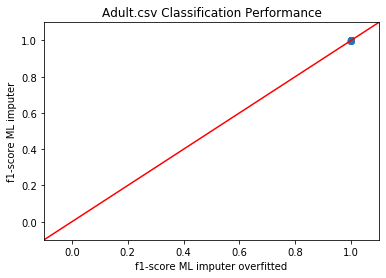

In [16]:
f1_ml = [y['f1'] for x in ml_imputer_results for y in ml_imputer_results[x] if 'f1' in y.keys()]
f1_overfit = [y['f1'] for x in ml_overfitting_results for y in ml_overfitting_results[x] if 'f1' in y.keys()]
fig, ax = plt.subplots()
sc = plt.scatter(f1_ml, 
                 f1_overfit, 
                 alpha=0.5)
plt.plot(np.linspace(-2, 2), np.linspace(-2, 2), c='red')
ax.set(title='Adult.csv Classification Performance',
      xlabel = 'f1-score ML imputer overfitted',
      ylabel = 'f1-score ML imputer',
      xlim = [-0.1, 1.1],
      ylim  = [-0.1, 1.1])
fig.savefig('ml-fd-classification.png', transparent=False,
           dpi=320, bbox_inches='tight')